<a href="https://colab.research.google.com/github/geeorgebixleer/Clusterizacion_Esencia_del_cliente/blob/main/Clusterizaci%C3%B3n_Esencia_del_cliente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clusterización: Esencia del cliente**

##**INTRODUCCIÓN:**

La junta directiva de la cadena de supermercados Universal Food ha observado una estabilización en sus ventas y busca comprender cómo mejorar la relación con sus clientes, entendiendo sus hábitos de compra, para ofrecerles un servicio de mayor calidad.

Para el propósito anterior, se realiza la segmentación de los clientes mediante un algoritmo de machine learning conocido como cluserización.Al conocer los hábitos de consumo de los clientes, es posible asignarles una categoría de acuerdo a sus preferencias, de forma que, se pueda proporcionarles una experiencia de compra más personalizada,
rápida y efectiva.

El conjunto de datos tomado para el presente análisis está basado en información de 60,000 clientes, tal como sus preferencias de consumo, promociones y características de los comercios.

Disponible en Kaggle:

https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart

##**RESUMEN:**

- **categoria_alimento:** tipo de alimentos.
- **departamento:** departamento al que pertenece el tipo de alimento.
- **tipo:** familia de alimentos a la que pertenece.
- **ventas_tienda(en millones):** ventas en tienda (en millones de dólares).
- **costo_tienda(en millones):** costo o gasto de la tienda (en millones de dólares).
- **ventas_unitarias(en millones):** cantidad unitaria de ventas en tiendas  (en millones).
- **promocion:** nombre de la promoción realizada en los medios.
- **pais:** país donde se realiza la venta.
- **estado_civil:** estado civil de los clientes.
- **genero:** género de los clientes.
- **total_de_hijos:** total de niños en el hogar.
- **escolaridad:** nivel de estudios del cliente.
- **membresia:** membresia disponible para el cliente.
- **ocupacion:** ocupación del cliente.
- **vivienda_propia:** el cliente es propietario de casa o no.
- **promedio_autos(aprox):** según los detalles llenados por el cliente.
- **ingreso_anual:** según los detalles llenados por el cliente.
- **numero_hijos:** según los detalles llenados por el cliente.
- **marca:** marca del producto.
- **precio_recomendado:** empaquetado listo para exponer (SRP).
- **peso_bruto:** peso bruto del producto.
- **peso_neto:** peso neto del producto.
- **empaque_reciclable:** El empaque es reciclable.
- **bajo_en_grasa:** alimento bajo en grasa.
- **unidades_por_caja:** unidades disponibles en los estantes de cada tienda.
- **comercio:** tipo de tienda.
- **ciudad:** tienda disponible en la ciudad.
- **estado:** tienda presente en cuál estado.
- **pies_cuadrados_tienda:** área de la tienda disponible en metros cuadrados (m2).
- **pies_cuadrados_comestibles:** área de comestibles en metros cuadrados (m2).
- **pies_cuadrados_congelados:** área de alimentos congelados en metros cuadrados (m2).
- **pies_cuadrados_carne:** área de carne en metros cuadrados (m2).
- **cafeteria:** barra de café disponible en tienda.
- **tienda_de_videos:** tienda de videos/tienda de juegos disponible en tienda.
- **barra_de_ensaladas:** barra de ensaladas disponible en tienda.
- **comida_preparada:** comida preparada disponible en tienda.
- **floristeria:** estantes de flores disponibles en tienda.
- **divulgacion:** medios de comunicación usados aquí.
- **costo:** costo de adquisición de clientes en dólares (USD).

##1.Configuración del ambiente

In [4]:
# versión de las librerias
!python -V
print('------')
!pip show pandas | grep 'Name\|Version'
print('------')
!pip show numpy | grep 'Name\|Version'
print('------')
!pip show seaborn | grep 'Name\|Version'
print('------')
!pip show matplotlib | grep 'Name\|Version'


Python 3.10.12
------
Name: pandas
Version: 2.1.4
------
Name: numpy
Version: 1.26.4
        Name: lapack-lite
        Name: tempita
        Name: dragon4
        Name: libdivide
        Name: Meson
        Name: spin
        Name: OpenBLAS
        Name: LAPACK
        Name: GCC runtime library
        Version 3.1, 31 March 2009
                               Version 3, 29 June 2007
          5. Conveying Modified Source Versions.
          14. Revised Versions of this License.
        Name: libquadmath
------
Name: seaborn
Version: 0.13.1
------
Name: matplotlib
Version: 3.7.1


In [5]:
# importando librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from numpy import array_split
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
pd.set_option('display.max_columns', None)

##2.Importación y transformación de datos

In [6]:
# conexión con drive para importar dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# importando link del dataset
uri = "/content/drive/MyDrive/Bootcamp - Data Science/Modulo3_Machine Learning/Esencia_del_cliente-Challege/media prediction and its cost.csv"
datos = pd.read_csv(uri) #cargando dataset

In [8]:
# delimitando impresión de máximo 10 filas y 40 columnas
pd.set_option('display.max_rows',10)
pd.set_option('display.max_columns',40)
datos.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,avg_cars_at home(approx).1,brand_name,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,store_type,store_city,store_state,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

In [10]:
# diccionario para renombrar columnas
columnas = {
    'food_category': 'categoria_alimento',
    'food_department': 'departamento',
    'food_family': 'tipo',
    'store_sales(in millions)': 'ventas_tienda(en millones)',
    'store_cost(in millions)': 'costo_tienda(en millones)',
    'unit_sales(in millions)': 'ventas_unitarias(en millones)',
    'promotion_name': 'promocion',
    'sales_country': 'pais',
    'marital_status': 'estado_civil',
    'gender': 'genero',
    'total_children': 'total_de_hijos',
    'education': 'escolaridad',
    'member_card': 'membresia',
    'occupation': 'ocupacion',
    'houseowner': 'vivienda_propia',
    'avg_cars_at home(approx)': 'promedio_autos(aprox)',
    'avg. yearly_income': 'ingreso_anual',
    'num_children_at_home': 'numero_hijos',
    'avg_cars_at home(approx).1': 'promedio_autos(aprox).1',
    'brand_name': 'marca',
    'SRP': 'precio_recomendado',
    'gross_weight': 'peso_bruto',
    'net_weight': 'peso_neto',
    'recyclable_package': 'empaque_reciclable',
    'low_fat': 'bajo_en_grasa',
    'units_per_case': 'unidades_por_caja',
    'store_type': 'comercio',
    'store_city': 'ciudad',
    'store_state': 'estado',
    'store_sqft': 'pies_cuadrados_tienda',
    'grocery_sqft': 'pies_cuadrados_comestibles',
    'frozen_sqft': 'pies_cuadrados_congelados',
    'meat_sqft': 'pies_cuadrados_carne',
    'coffee_bar': 'cafeteria',
    'video_store': 'tienda_de_videos',
    'salad_bar': 'barra_de_ensaladas',
    'prepared_food': 'comida_preparada',
    'florist': 'floristeria',
    'media_type': 'divulgacion',
    'cost': 'costo'
}

In [11]:
# nuevo dataset con datos en español
datos_sp = datos.rename(columns=columnas)
datos_sp.head(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,membresia,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,4.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,2.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Deluxe Supermarket,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [12]:
# eliminando columna repetida
datos_sp = datos_sp.drop(columns = 'promedio_autos(aprox).1', axis=1 )

In [13]:
# diccionarios para renombrar valores de columnas
categoria = {
    'Vegetables': 'Vegetales',
    'Snack Foods': 'Alimentos para picar',
    'Dairy': 'Productos lácteos',
    'Meat': 'Carne',
    'Fruit': 'Fruta',
    'Jams and Jellies': 'Mermeladas y jaleas',
    'Baking Goods': 'Productos para hornear',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Bread': 'Pan',
    'Canned Soup': 'Sopa enlatada',
    'Beer and Wine': 'Cerveza y vino',
    'Paper Products': 'Productos de papel',
    'Bathroom Products': 'Productos de baño',
    'Electrical': 'Eléctrico',
    'Candy': 'Dulces',
    'Frozen Desserts': 'Postres congelados',
    'Specialty': 'Especialidades',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Magazines': 'Revistas',
    'Kitchen Products': 'Productos de cocina',
    'Eggs': 'Huevos',
    'Hot Beverages': 'Bebidas calientes',
    'Hygiene': 'Higiene',
    'Pain Relievers': 'Analgésicos',
    'Pizza': 'Pizza',
    'Carbonated Beverages': 'Bebidas carbonatadas',
    'Pure Juice Beverages': 'Bebidas de jugo puro',
    'Cleaning Supplies': 'Suministros de limpieza',
    'Side Dishes': 'Acompañamientos',
    'Frozen Entrees': 'Platos preparados congelados',
    'Drinks': 'Bebidas',
    'Plastic Products': 'Productos de plástico',
    'Hardware': 'Artículos de ferretería',
    'Cold Remedies': 'Remedios para el resfriado',
    'Decongestants': 'Descongestionantes',
    'Canned Tuna': 'Atún enlatado',
    'Seafood': 'Mariscos',
    'Canned Anchovies': 'Anchoas enlatadas',
    'Canned Clams': 'Almejas enlatadas',
    'Candles': 'Velas',
    'Miscellaneous': 'Misceláneos',
    'Canned Oysters': 'Ostras enlatadas',
    'Canned Shrimp': 'Camarones enlatados',
    'Packaged Vegetables': 'Vegetales envasados',
    'Canned Sardines': 'Sardinas enlatadas'
}

departamento = {
    'Produce': 'Productos frescos',
    'Snack Foods': 'Alimentos para picar',
    'Household': 'Artículos para el hogar',
    'Frozen Foods': 'Alimentos congelados',
    'Baking Goods': 'Productos para hornear',
    'Canned Foods': 'Alimentos enlatados',
    'Dairy': 'Productos lácteos',
    'Health and Hygiene': 'Salud e higiene',
    'Beverages': 'Bebidas',
    'Deli': 'Charcutería',
    'Baked Goods': 'Productos horneados',
    'Alcoholic Beverages': 'Bebidas alcohólicas',
    'Snacks': 'Snacks',
    'Starchy Foods': 'Alimentos ricos en almidón',
    'Periodicals': 'Publicaciones periódicas',
    'Eggs': 'Huevos',
    'Breakfast Foods': 'Alimentos para el desayuno',
    'Canned Products': 'Productos enlatados',
    'Checkout': 'Caja de salida',
    'Meat': 'Carne',
    'Seafood': 'Mariscos',
    'Carousel': 'Carrusel'
}

tipo= {'Food':'Comida', 'Non-Consumable':'No comestible', 'Drink':'Bebida'}

promocion = {
    'Weekend Markdown': 'Descuento de fin de semana',
    'Two Day Sale': 'Venta de dos días',
    'Price Savers': 'Ahorro de precios',
    'Price Winners': 'Ganadores de precios',
    'Save-It Sale': 'Venta Ahorra Ya',
    'Super Duper Savers': 'Super Ahorradores',
    'Super Savers': 'Super Ahorro',
    'One Day Sale': 'Venta de un día',
    'Double Down Sale': 'Venta Doble',
    'High Roller Savings': 'Ahorro para apostadores grandes',
    'Green Light Days': 'Días de luz verde',
    'Shelf Clearing Days': 'Días de liquidación de estanterías',
    'Price Slashers': 'Rebajadores de precios',
    'Free For All': 'Gratis para todos',
    'Cash Register Lottery': 'Lotería de la caja registradora',
    'Go For It': 'Adelante',
    'Two for One': 'Dos por uno',
    'Money Savers': 'Ahorradores de dinero',
    'Big Time Discounts': 'Descuentos de gran magnitud',
    'Price Destroyers': 'Destructores de precios',
    'Saving Days': 'Días de ahorro',
    'Dollar Cutters': 'Recortadores de dólares',
    'Unbeatable Price Savers': 'Ahorro de precios imbatible',
    'Sales Galore': 'Promociones por montones',
    'Big Promo': 'Gran promoción',
    'Dimes Off': 'Más barato',
    'Sales Days': 'Días de venta',
    'Price Cutters': 'Rebajando precios',
    'You Save Days': 'Días de ahorro',
    'Savings Galore': 'Ahorros por montones',
    'Bag Stuffers': 'Bolsas llenas',
    'Three for One': 'Tres por uno',
    'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
    'Sale Winners': 'Ganadores de ventas',
    'Pick Your Savings': 'Elige tus ahorros',
    'Bye Bye Baby': 'Adiós bebé',
    'Best Savings': 'Mejores ahorros',
    'Tip Top Savings': 'Ahorro de primera clase',
    'Shelf Emptiers': 'Estantes vacíos',
    'Big Time Savings': 'Ahorro Enorme',
    'Wallet Savers': 'Ahorradores de billetera',
    'Dollar Days': 'Días de dólar',
    'Mystery Sale': 'Venta misteriosa',
    'Price Smashers': 'Aplastadores de precios',
    'Green Light Special': 'Especial luz verde',
    'Coupon Spectacular': 'Espectacular de cupones',
    'Super Wallet Savers': 'Super ahorradores de billetera',
    'Double Your Savings': 'Duplica tus ahorros',
    'Fantastic Discounts': 'Descuentos fantásticos'
}

escolaridad = {
    'Partial High School':'Primaria',
    'High School Degree':'Secundaria',
    'Bachelors Degree':'Superior',
    'Partial College':'Técnico',
    'Graduate Degree':'Maestría'
}

pais = {'USA':'Estados Unidos', 'Mexico':'México', 'Canada':'Canadá'}

estado_civil = {'S':'Soltero', 'M':'Casado'}

genero ={'F':'Femenino', 'M':'Masculino'}

membresia = {'Normal':'Sin membresia', 'Bronze':'Bronce', 'Golden': 'Oro', 'Silver':'Plata'}

ocupacion = {
    'Professional':'Profesional',
    'Skilled Manual':'Técnico',
    'Manual':'Obrero',
    'Management':'Gestión',
    'Clerical':'Cargo de Oficina'
}

vivienda_propia= {'Y':'Sí', 'N':'No'}

ingreso_anual={
    '$30K - $50K':40000,
    '$10K - $30K':20000,
    '$50K - $70K':60000,
    '$70K - $90K':80000,
    '$130K - $150K':140000,
    '$90K - $110K':100000,
    '$110K - $130K':120000,
    '$150K +':160000
}

comercio = {
    'Supermarket': 'Supermercado',
    'Deluxe Supermarket': 'Supermercado de lujo',
    'Gourmet Supermarket': 'Supermercado gourmet',
    'Mid-Size Grocery': 'Supermercado mediano',
    'Small Grocery': 'Pequeño supermercado'
}

divulgacion = {
    'Daily Paper, Radio': 'Periódico diario, radio',
    'Product Attachment': 'Anexo del producto',
    'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
    'Daily Paper': 'Periódico diario',
    'Street Handout': 'Panfletos',
    'Radio': 'Radio',
    'Sunday Paper': 'Periódico dominical',
    'In-Store Coupon': 'Cupón en la tienda',
    'Sunday Paper, Radio': 'Periódico dominical, radio',
    'Cash Register Handout': 'Entrega en el punto de venta',
    'TV': 'Televisión',
    'Bulk Mail': 'Correo masivo',
    'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'
}

In [14]:
# renombrando valores de columnas
datos_sp.categoria_alimento = datos_sp.categoria_alimento.map(categoria)
datos_sp.departamento = datos_sp.departamento.map(departamento)
datos_sp.tipo =  datos_sp.tipo.map(tipo)
datos_sp.promocion = datos_sp.promocion.map(promocion)
datos_sp.escolaridad = datos_sp.escolaridad.map(escolaridad)
datos_sp.pais = datos_sp.pais.map(pais)
datos_sp.estado_civil = datos_sp.estado_civil.map(estado_civil)
datos_sp.genero = datos_sp.genero.map(genero)
datos_sp.membresia = datos_sp.membresia.map(membresia)
datos_sp.ocupacion = datos_sp.ocupacion.map(ocupacion)
datos_sp.vivienda_propia = datos_sp.vivienda_propia.map(vivienda_propia)
datos_sp.ingreso_anual = datos_sp.ingreso_anual.map(ingreso_anual)
datos_sp.comercio = datos_sp.comercio.map(comercio)
datos_sp.divulgacion = datos_sp.divulgacion.map(divulgacion)

In [15]:
datos_sp.sample(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,membresia,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
13421,Bebidas calientes,Bebidas,Bebida,6.87,2.4045,3.0,Gratis para todos,Estados Unidos,Soltero,Femenino,1.0,Primaria,Bronce,Técnico,Sí,1.0,20000,0.0,CDR,2.29,9.52,7.52,0.0,0.0,31.0,Supermercado de lujo,Tacoma,WA,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,Panfletos,55.18
29930,Bebidas de jugo puro,Bebidas,Bebida,13.04,5.9984,4.0,Venta de un día,Estados Unidos,Soltero,Femenino,4.0,Primaria,Sin membresia,Obrero,Sí,1.0,20000,0.0,Excellent,3.26,16.40,14.30,0.0,0.0,14.0,Supermercado gourmet,Beverly Hills,CA,23688.0,15337.0,5011.0,3340.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio, televisión",85.88
31977,Sopa enlatada,Alimentos enlatados,Comida,11.28,3.8352,3.0,Ahorros por montones,Estados Unidos,Casado,Femenino,1.0,Maestría,Bronce,Gestión,Sí,3.0,80000,0.0,Just Right,3.76,7.12,6.11,0.0,1.0,14.0,Supermercado,Seattle,WA,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,Panfletos,138.53
32452,Sopa enlatada,Alimentos enlatados,Comida,11.94,4.7760,3.0,Adelante,Estados Unidos,Soltero,Femenino,3.0,Primaria,Bronce,Técnico,No,1.0,40000,0.0,Better,3.98,7.47,5.46,0.0,0.0,8.0,Supermercado,Portland,OR,20319.0,16232.0,2452.0,1635.0,0.0,0.0,0.0,0.0,0.0,Anexo del producto,119.30
39034,Alimentos para picar,Alimentos para picar,Comida,1.02,0.4794,2.0,Super Ahorradores,México,Casado,Femenino,1.0,Superior,Bronce,Profesional,Sí,2.0,60000,1.0,Fast,0.51,12.30,11.30,1.0,1.0,26.0,Pequeño supermercado,Guadalajara,Jalisco,24597.0,15012.0,5751.0,3834.0,1.0,0.0,0.0,0.0,0.0,Televisión,116.91


###2.1.Eliminación de outliers

<Axes: >

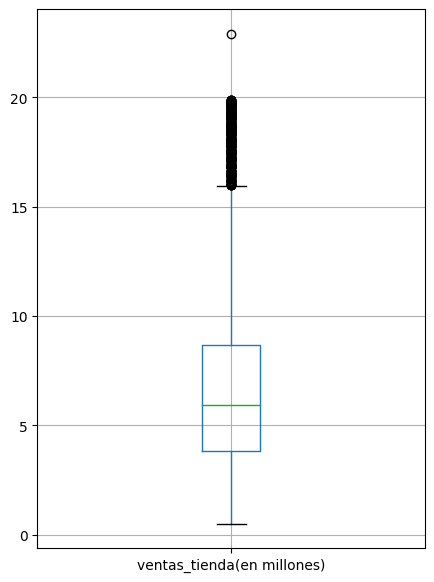

In [16]:
datos_sp.boxplot(['ventas_tienda(en millones)'], figsize = (5,7)) #outliers en ventas_tienda

In [17]:
datos_sp_out = datos_sp[datos_sp['ventas_tienda(en millones)'] > 15] #dataset temporal que indica outliers
print(datos_sp_out.shape) #total de outliers en el dataset temporal
datos_sp = datos_sp[datos_sp['ventas_tienda(en millones)'] < 15] #sobreescrita de dataset, limpio de outliers
print(datos_sp.shape) #total de registros sin outliers

(1191, 39)
(59215, 39)


<Axes: >

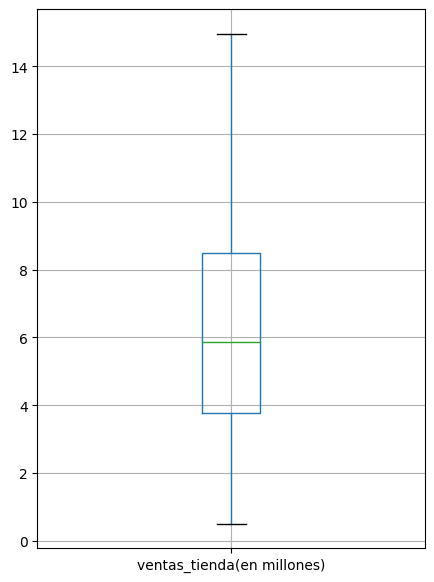

In [18]:
datos_sp.boxplot(['ventas_tienda(en millones)'], figsize = (5,7))

In [19]:
# exportando a csv
datos_sp.to_csv('foodmart.csv', index = False)

##3.Exploración de datos

In [20]:
datos_sp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59215 entries, 0 to 60427
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             59215 non-null  object 
 1   departamento                   59215 non-null  object 
 2   tipo                           59215 non-null  object 
 3   ventas_tienda(en millones)     59215 non-null  float64
 4   costo_tienda(en millones)      59215 non-null  float64
 5   ventas_unitarias(en millones)  59215 non-null  float64
 6   promocion                      59215 non-null  object 
 7   pais                           59215 non-null  object 
 8   estado_civil                   59215 non-null  object 
 9   genero                         59215 non-null  object 
 10  total_de_hijos                 59215 non-null  float64
 11  escolaridad                    59215 non-null  object 
 12  membresia                      59215 non-null  obje

###3.1.Barras verticales

In [21]:
def barras_v_1(data, var_x, var_y, var_cat, tema):
  plt.figure(figsize=(14,5)) #tamaño fig
  data=data.groupby([var_x, var_cat])[var_y].sum().reset_index() #data = agrupa var_cat y var_x, suma valores var_y y genera un nuevo index
  sns.barplot(x=var_x, y=var_y, hue=var_cat, data=data, palette=tema) #data e hiperparámetros del grafico
  plt.suptitle(f'{var_y} por {var_x}/{var_cat}', fontsize=18, fontweight='bold',color='k') #titulo del gráfico
  plt.xlabel(var_x) # etiqueta eje x
  plt.ylabel('')
  plt.show()

In [22]:
def barras_v_2(data, var_x, var_y, var_cat,tema): #funcion para graficar en barras
    plt.figure(figsize=(14, 5)) #tamaño de gráfico
    data=data.groupby([var_cat, var_x])[var_y].sum().reset_index() #agrupa datos_sp por var_cat y var_x, suma valores var_y y genera un nuevo index
    sns.barplot(x=var_x, y=var_y, hue=var_cat, data=data, palette=tema) #variables del grafico
    plt.suptitle(f'{var_y} por {var_x}/{var_cat}', fontsize=18, fontweight='bold',color='k') #titulo del gráfico
    plt.xlabel(var_x, fontsize=12, color='k', fontweight='bold') #etiqueta eje x
    plt.ylabel('') #sin etiqueta eje y
    plt.xticks(rotation=90) #inclinación de etiquetas de cada barra
    legend = plt.legend(title=var_cat) #leyenda
    legend.set_title(var_cat, prop={'size': 11, 'weight': 'bold'}) #propiedades de la leyenda
    plt.show()

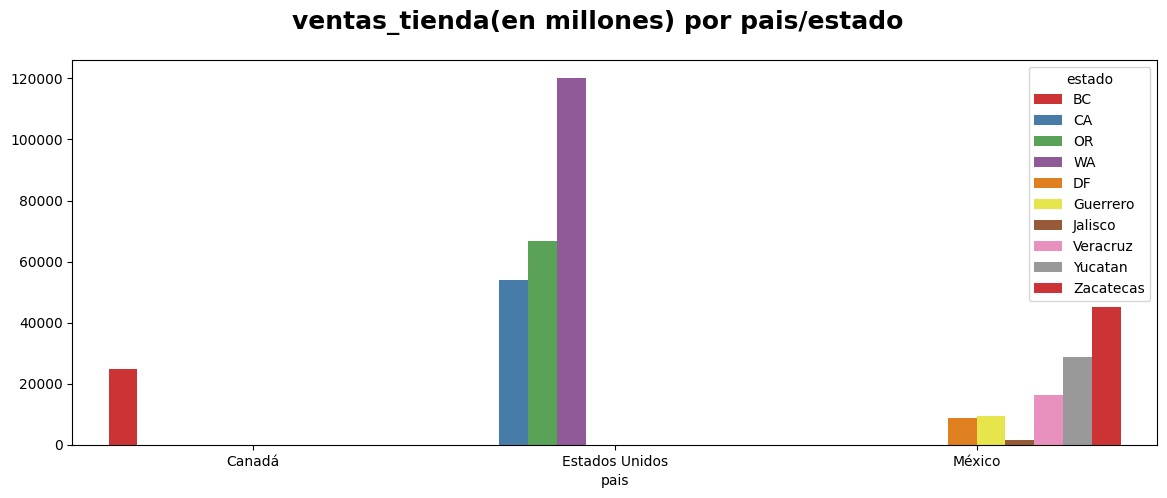

In [23]:
barras_v_1(datos_sp, 'pais', 'ventas_tienda(en millones)','estado','Set1')

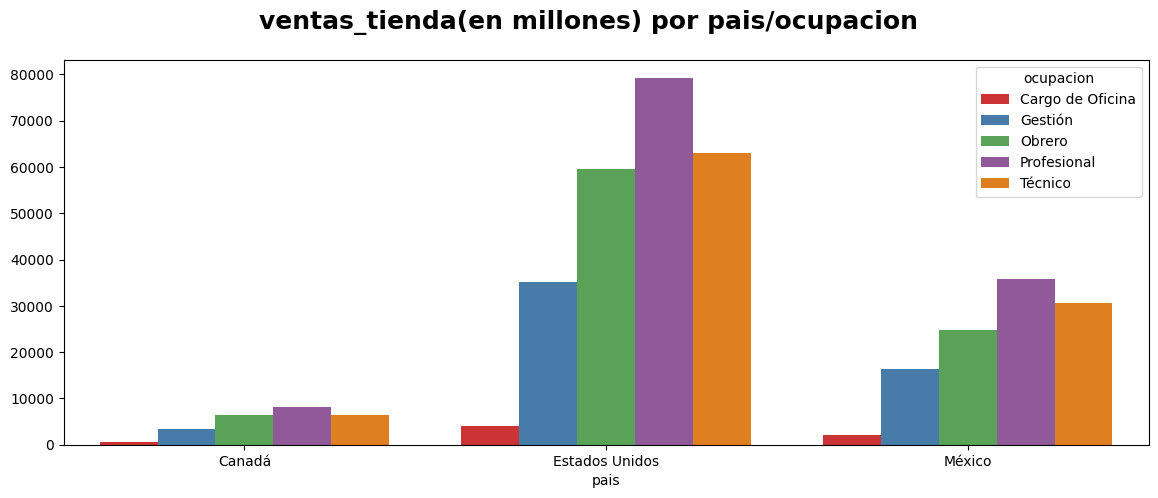

In [24]:
barras_v_1(datos_sp, 'pais', 'ventas_tienda(en millones)','ocupacion','Set1')

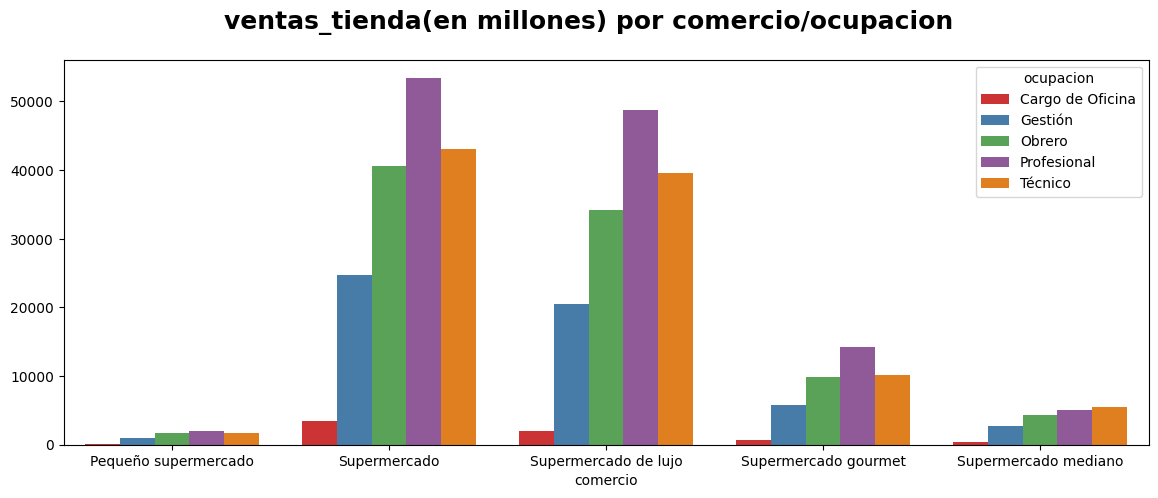

In [25]:
barras_v_1(datos_sp, 'comercio', 'ventas_tienda(en millones)', 'ocupacion', 'Set1')

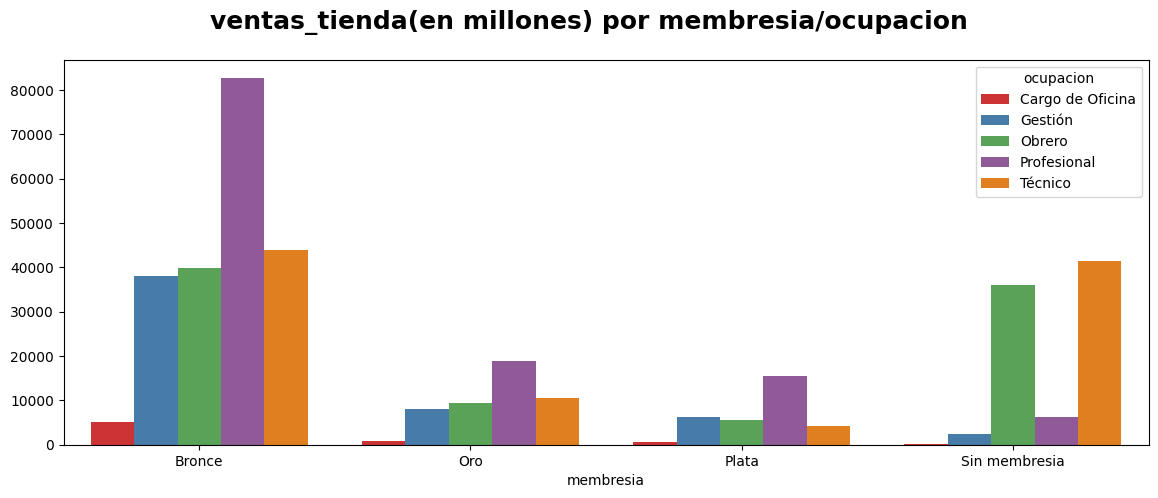

In [26]:
barras_v_1(datos_sp, 'membresia', 'ventas_tienda(en millones)', 'ocupacion', 'Set1')

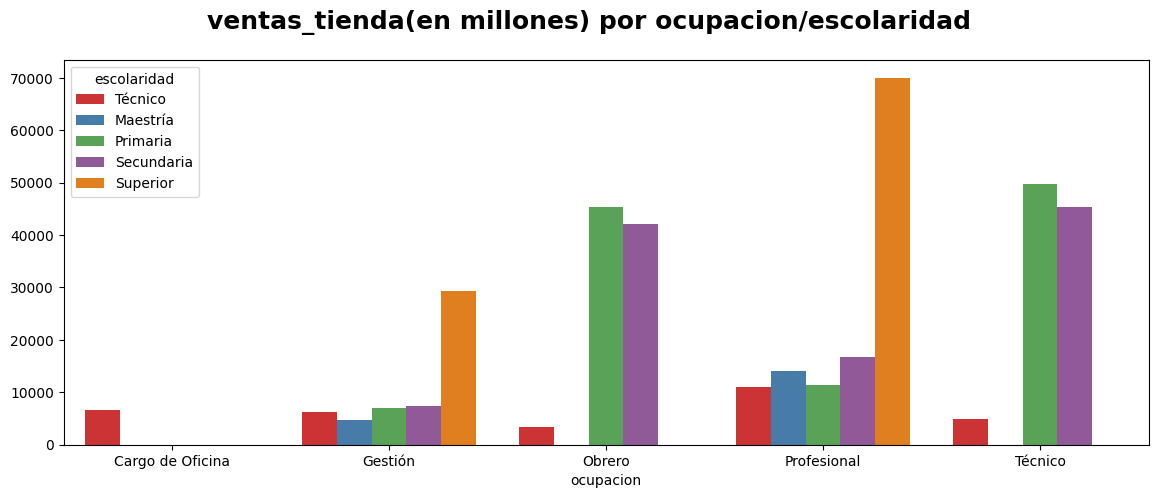

In [27]:
barras_v_1(datos_sp, 'ocupacion', 'ventas_tienda(en millones)', 'escolaridad', 'Set1')

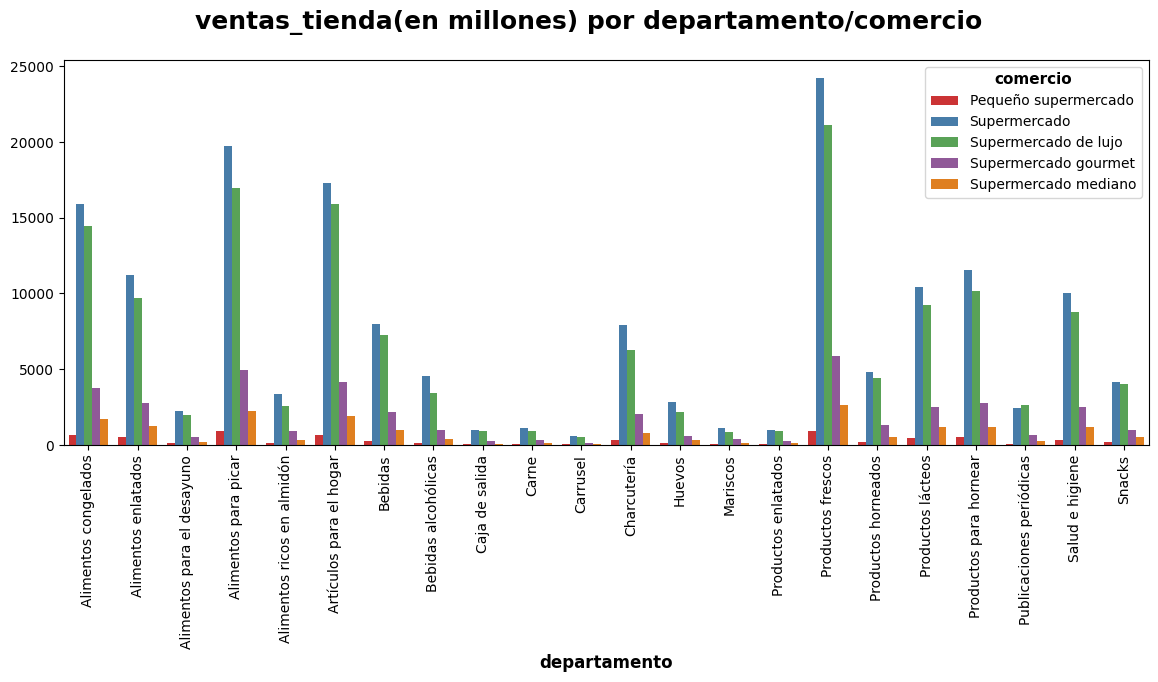

In [28]:
barras_v_2(datos_sp, 'departamento', 'ventas_tienda(en millones)','comercio','Set1')

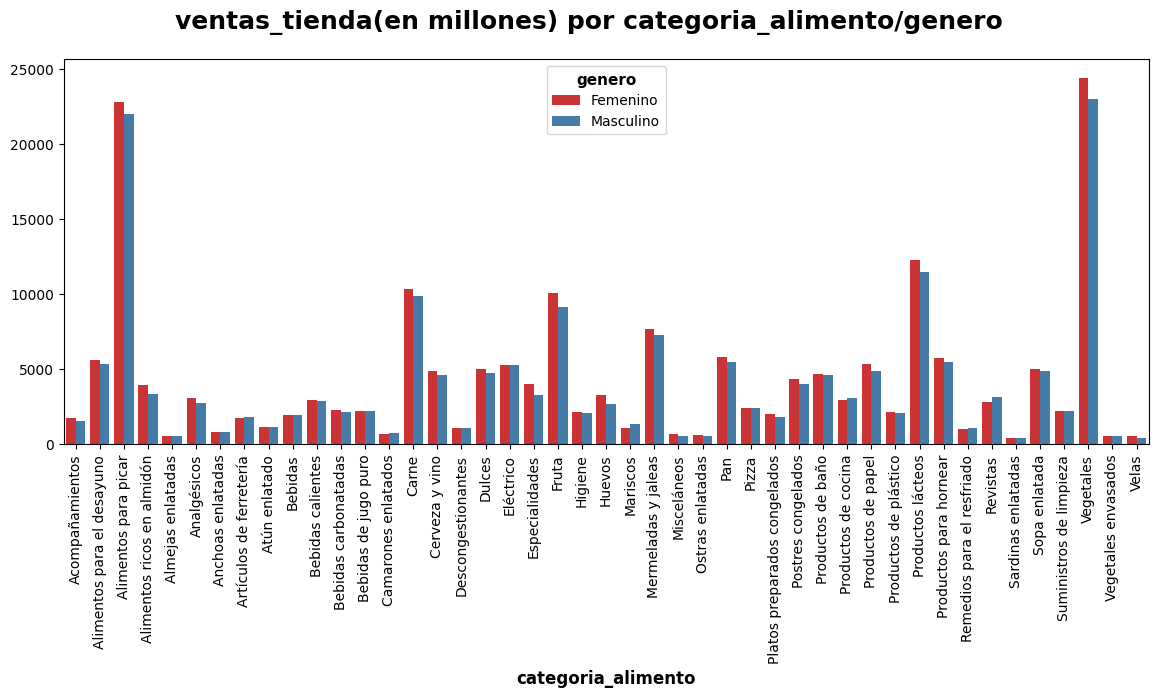

In [29]:
barras_v_2(datos_sp, 'categoria_alimento', 'ventas_tienda(en millones)','genero','Set1')

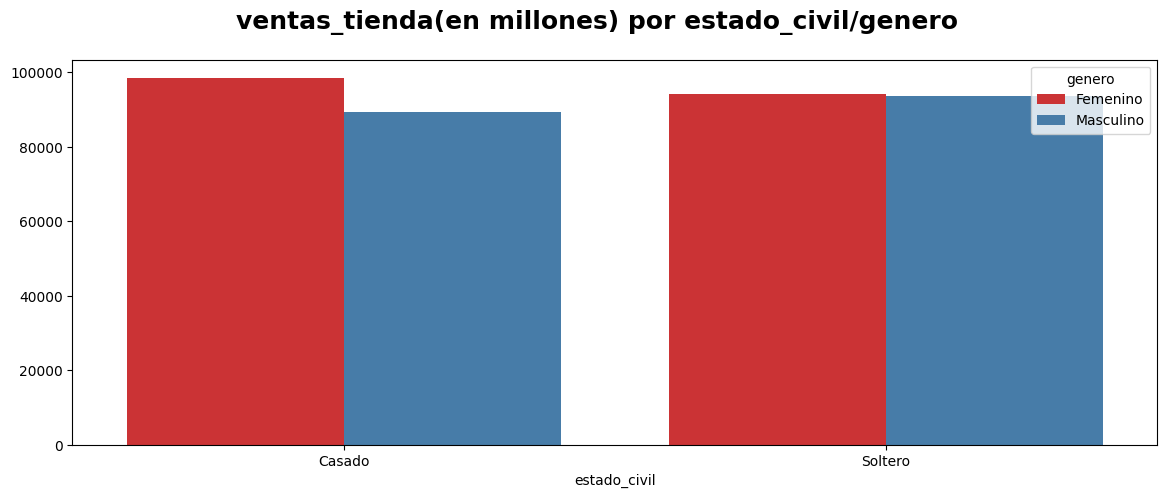

In [30]:
barras_v_1(datos_sp, 'estado_civil', 'ventas_tienda(en millones)','genero','Set1')

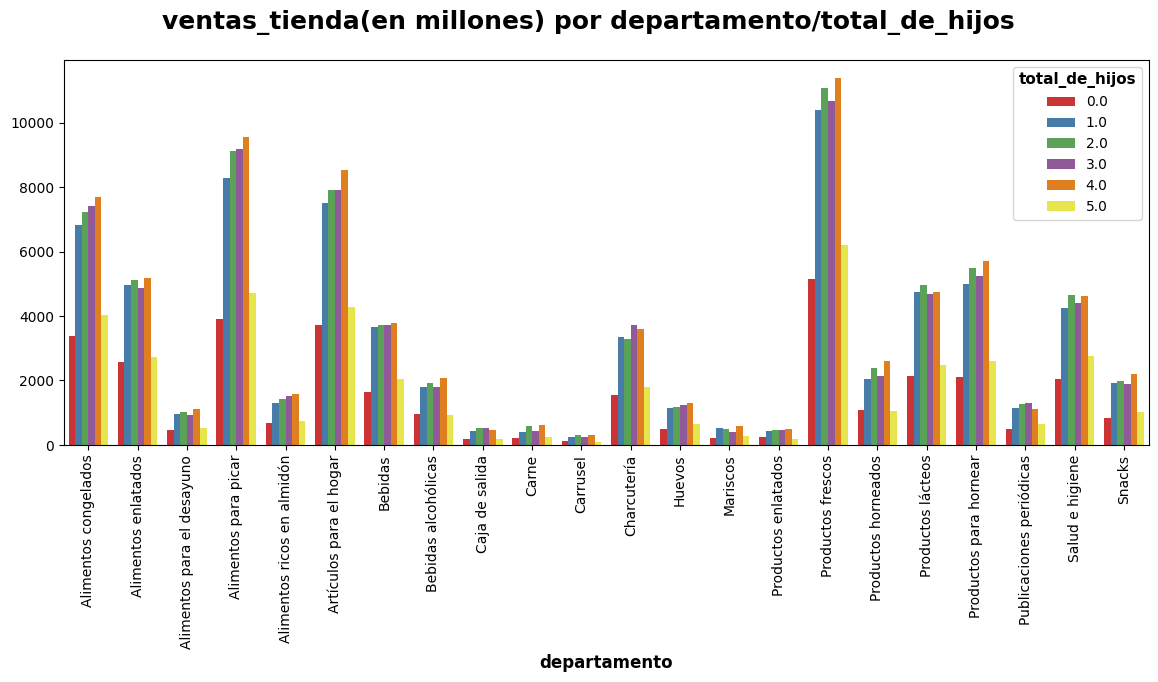

In [31]:
barras_v_2(datos_sp, 'departamento', 'ventas_tienda(en millones)','total_de_hijos','Set1')

###3.2.Barras horizontales

In [32]:
def barras_h(data, ax1, ax2, ax3, ax4, tema):
  axes_cat = [ax1, ax2, ax3, ax4] #lista de ejes para categorías
  fig, axes = plt.subplots(len(axes_cat), 1, figsize=(18, 10)) #tamaño figura y numero de ejes
  for ax, ax_cat in zip(axes, axes_cat): #zip recorre ambas listas
    sns.countplot(data=data, y=ax_cat, order=data[ax_cat].value_counts().head(15).index, ax= ax, hue=ax_cat, palette=tema) #grafico y parametros
    ax.set_title(f'Recuento de observaciones para "{ax_cat}"', fontsize=15, fontweight='bold') #titulo para cada eje
    ax.set_xlabel('') #etiqueta eje x
    ax.set_ylabel('') #etiqueta eje y
  plt.tight_layout() #ajuste automatico de los ejes
  plt.show()

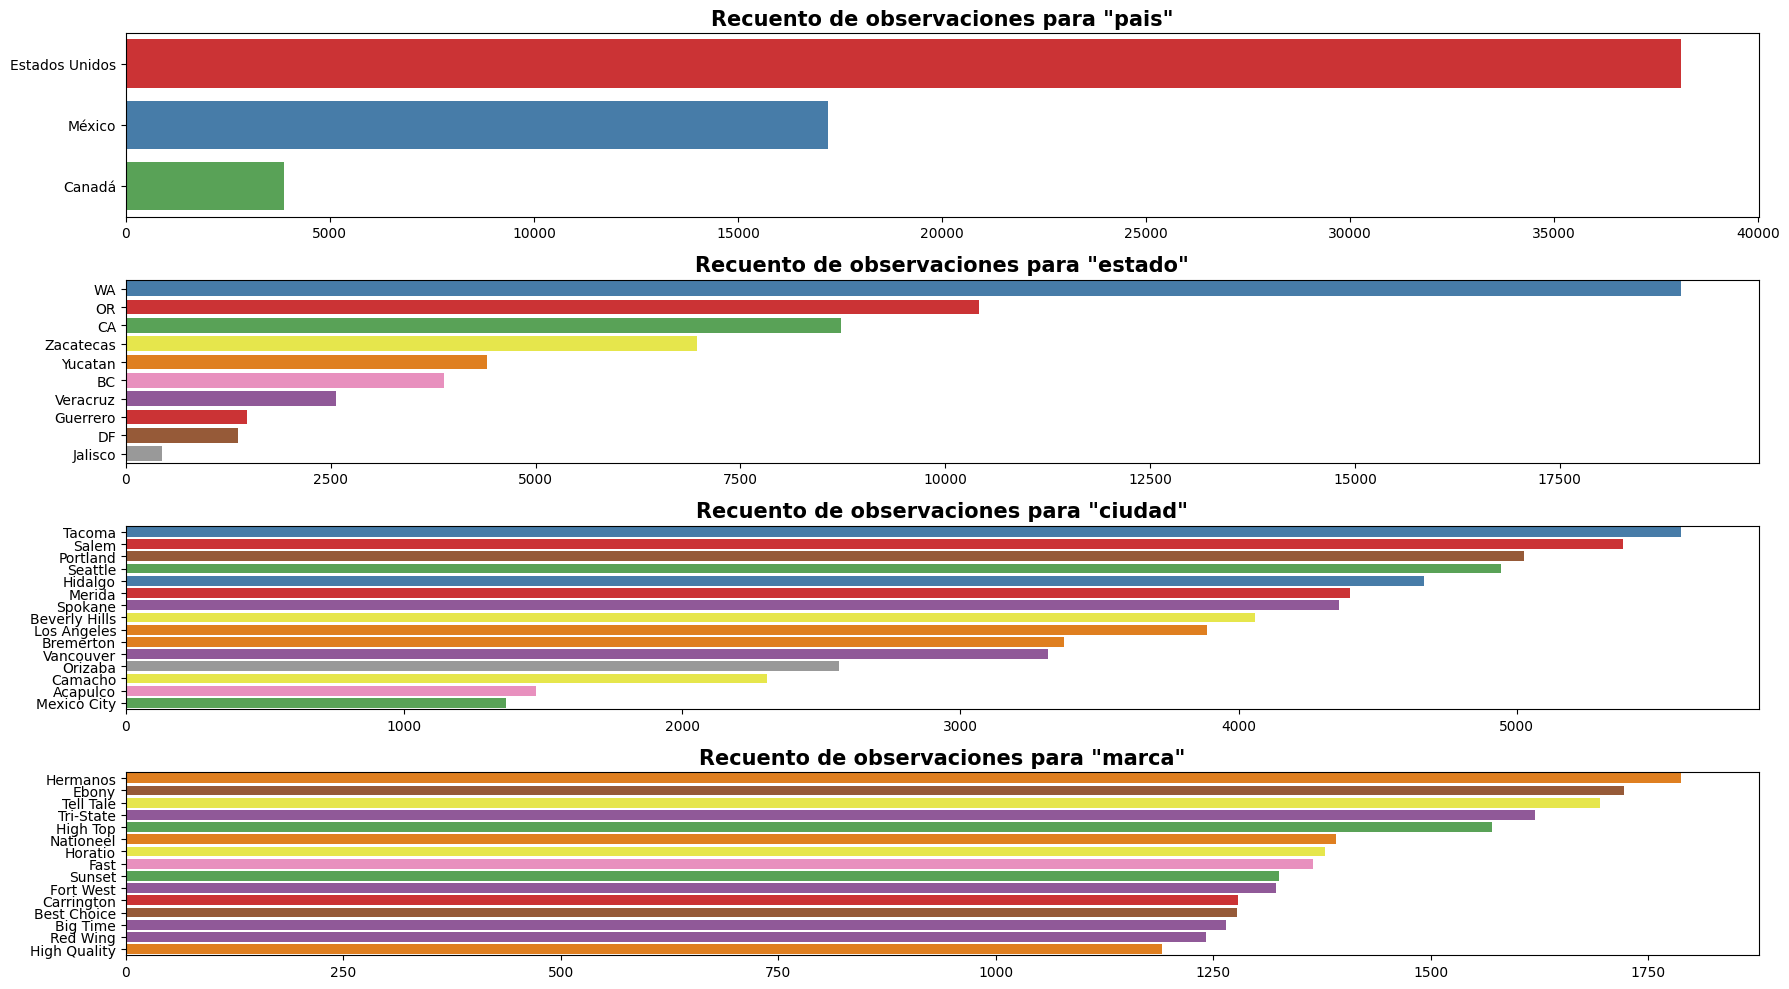

In [33]:
barras_h(datos_sp, 'pais', 'estado', 'ciudad', 'marca', 'Set1')

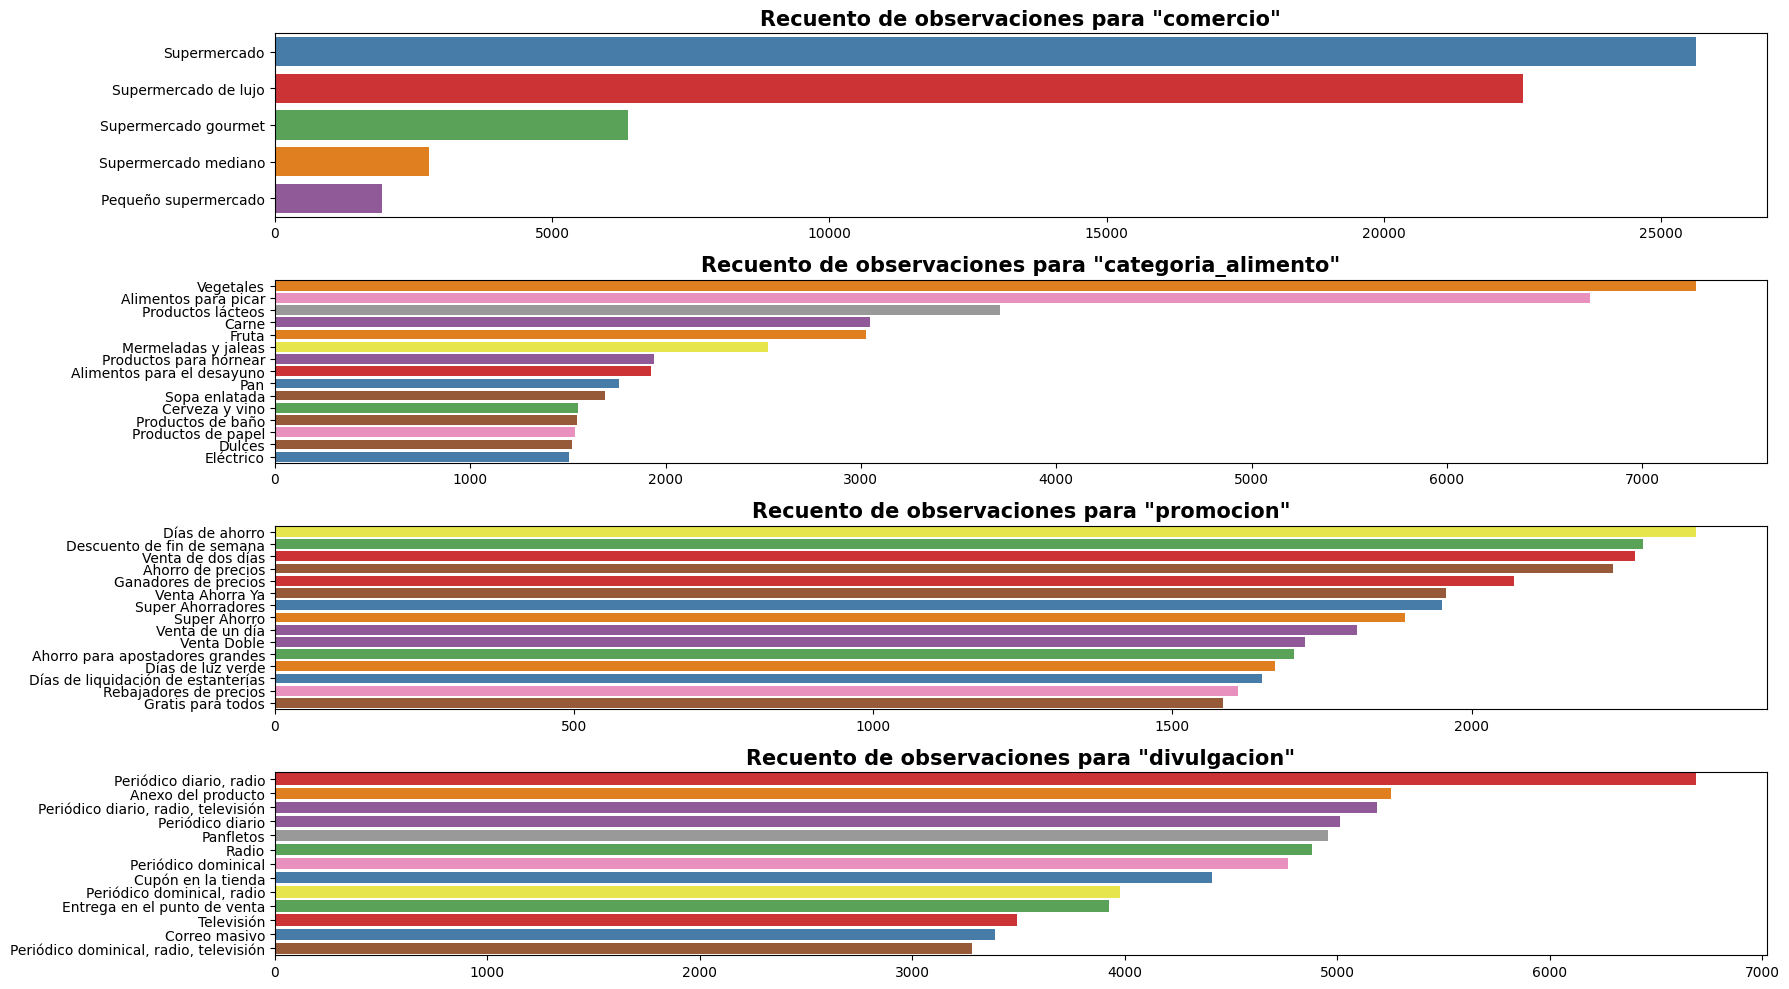

In [34]:
barras_h(datos_sp, 'comercio', 'categoria_alimento', 'promocion', 'divulgacion', 'Set1')

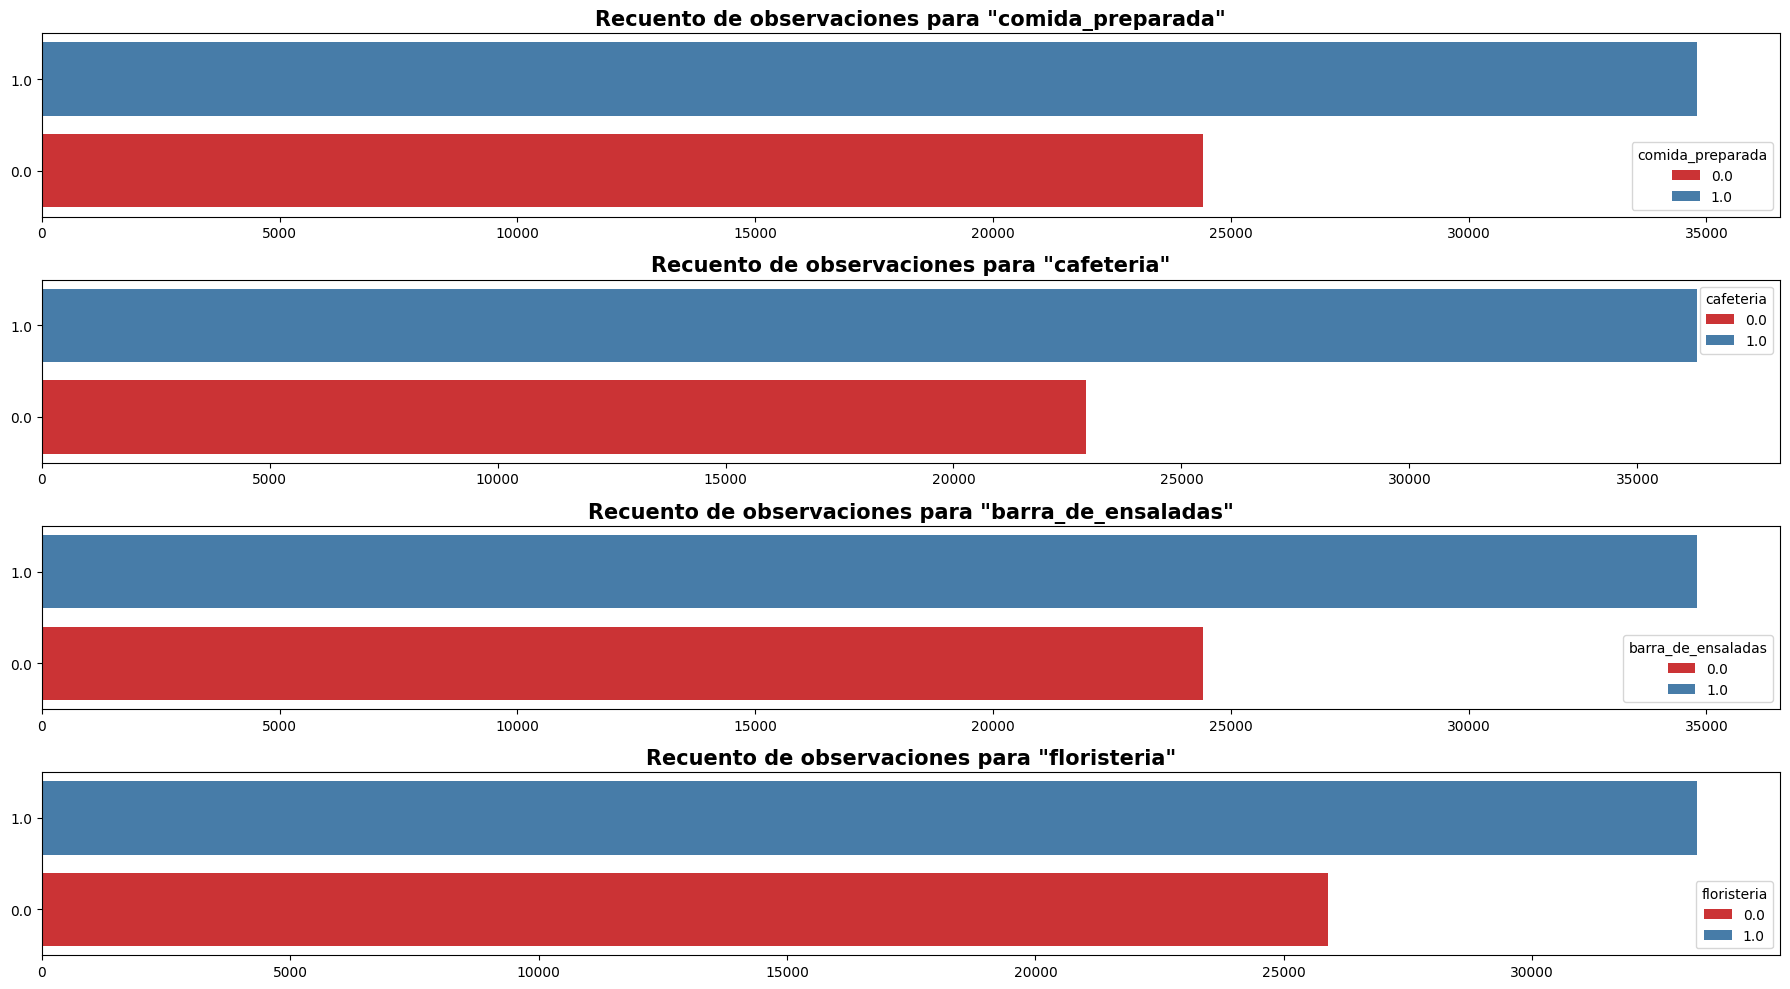

In [35]:
barras_h(datos_sp, 'comida_preparada', 'cafeteria', 'barra_de_ensaladas', 'floristeria', 'Set1')

##4.Mapeo y selección

In [36]:
datos_sp_map = datos_sp.copy() # dataset copia
datos_sp_map

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,membresia,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,1.0,Primaria,Sin membresia,Técnico,Sí,1.0,20000,1.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,0.0,Superior,Plata,Profesional,Sí,4.0,60000,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,4.0,Primaria,Sin membresia,Obrero,No,1.0,20000,0.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,2.0,Secundaria,Bronce,Obrero,Sí,2.0,40000,2.0,Carrington,1.84,19.70,17.70,1.0,0.0,17.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,0.0,Primaria,Bronce,Técnico,No,2.0,40000,0.0,Golden,1.36,7.12,5.11,0.0,1.0,29.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Especialidades,Carrusel,No comestible,2.76,1.3248,1.0,Días de ahorro,Estados Unidos,Casado,Femenino,1.0,Primaria,Sin membresia,Técnico,Sí,1.0,20000,1.0,ADJ,2.76,19.60,18.60,1.0,0.0,26.0,Pequeño supermercado,San Francisco,CA,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Cupón en la tienda,95.25
60424,Especialidades,Carrusel,No comestible,1.60,0.4960,1.0,Rebajando precios,Estados Unidos,Soltero,Femenino,2.0,Secundaria,Bronce,Técnico,No,2.0,40000,0.0,Symphony,1.60,17.40,15.30,1.0,0.0,36.0,Pequeño supermercado,San Francisco,CA,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Periódico dominical,69.42
60425,Especialidades,Carrusel,No comestible,5.52,2.5392,2.0,Descuento de fin de semana,Estados Unidos,Casado,Masculino,1.0,Secundaria,Bronce,Obrero,Sí,3.0,40000,0.0,ADJ,2.76,19.60,18.60,1.0,0.0,26.0,Pequeño supermercado,San Francisco,CA,22478.0,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Periódico dominical, radio, televisión",67.51
60426,Especialidades,Carrusel,No comestible,8.28,2.5668,3.0,Días de venta,Canadá,Soltero,Masculino,2.0,Superior,Bronce,Profesional,No,4.0,80000,0.0,ADJ,2.76,19.60,18.60,1.0,0.0,26.0,Supermercado mediano,Victoria,BC,34452.0,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Periódico dominical,132.88


###4.1.Mapeo de valores

In [37]:
# diccionarios para sustituir valores y sustitución de valores en dataset copia
departamento_map = { 'Alimentos congelados':1, 'Productos horneados':2,
       'Alimentos enlatados':3, 'Productos para hornear':4,
       'Productos frescos':5, 'Snacks':6, 'Alimentos para picar':7,
       'Productos lácteos':8, 'Alimentos ricos en almidón':9,
       'Artículos para el hogar':10, 'Salud e higiene':11, 'Carne':12, 'Bebidas':13,
       'Mariscos':14, 'Charcutería':15, 'Bebidas alcohólicas':16,
       'Productos enlatados':17, 'Huevos':19, 'Publicaciones periódicas':20,
       'Alimentos para el desayuno':21, 'Caja de salida':22, 'Carrusel':23
    }

tipo_map = {
    'Comida':1, 'No comestible':2, 'Bebida':3
    }

escolaridad_map = {
    'Primaria': 1, 'Superior':4, 'Secundaria':2, 'Maestría':5, 'Técnico':3
    }

ocupacion_map = {
    'Técnico':1, 'Profesional':2, 'Obrero':3, 'Gestión':4, 'Cargo de Oficina':5
    }

membresia_map = {
    'Sin membresia':1, 'Plata':3, 'Bronce':2, 'Oro':4
    }

comercio_map = {
    'Supermercado de lujo':1, 'Supermercado':2, 'Supermercado gourmet':3,
       'Pequeño supermercado':4, 'Supermercado mediano':5
    }

divulgacion_map = {
    'Periódico diario, radio':1, 'Cupón en la tienda':2, 'Radio':3,
       'Periódico diario':4, 'Anexo del producto':5,
       'Periódico dominical, radio':6,
       'Periódico dominical, radio, televisión':7, 'Periódico dominical':8,
       'Panfletos':9, 'Televisión':10, 'Correo masivo':11,
       'Entrega en el punto de venta':12,
       'Periódico diario, radio, televisión':13
    }

estado_map = {
    'OR':1, 'WA':2, 'CA':3, 'Veracruz':4, 'Yucatan':5, 'Zacatecas':6, 'DF':7, 'BC':8,
       'Jalisco':9, 'Guerrero':10
}
pais_map = {
    'Estados Unidos':1, 'México':2, 'Canadá':3
    }

#mapeo/sustitución de valores
datos_sp_map.departamento = datos_sp_map.departamento.map(departamento_map)
datos_sp_map.tipo = datos_sp_map.tipo.map(tipo_map)
datos_sp_map.escolaridad = datos_sp_map.escolaridad.map(escolaridad_map)
datos_sp_map.ocupacion = datos_sp_map.ocupacion.map(ocupacion_map)
datos_sp_map.membresia = datos_sp_map.membresia.map(membresia_map)
datos_sp_map.comercio = datos_sp_map.comercio.map(comercio_map)
datos_sp_map.divulgacion = datos_sp_map.divulgacion.map(divulgacion_map)
datos_sp_map.estado = datos_sp_map.estado.map(estado_map)
datos_sp_map.pais = datos_sp_map.pais.map(pais_map)

In [38]:
datos_sp_map.sample(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,membresia,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
29500,Carne,15,1,8.28,3.8088,3.0,Especial luz verde,1,Casado,Femenino,2.0,1,4,2,Sí,2.0,160000,1.0,American,2.76,7.49,6.48,1.0,1.0,33.0,2,Bremerton,2,39696.0,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,2,123.02
22977,Cerveza y vino,16,3,11.36,4.3168,4.0,Ahorro de precios imbatible,1,Casado,Femenino,0.0,2,2,3,Sí,2.0,40000,0.0,Good,2.84,10.50,8.50,0.0,0.0,12.0,2,Seattle,2,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,11,66.78
21975,Eléctrico,10,2,4.11,2.0139,3.0,Lotería de la caja registradora,1,Soltero,Masculino,3.0,4,2,2,Sí,1.0,80000,0.0,High Quality,1.37,10.10,7.10,1.0,0.0,16.0,1,Salem,1,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,1,59.86
31098,Mermeladas y jaleas,4,1,5.58,2.5110,3.0,Adiós bebé,1,Soltero,Femenino,1.0,1,1,3,Sí,1.0,20000,0.0,CDR,1.86,13.50,10.50,1.0,0.0,16.0,2,Seattle,2,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,3,90.58
3070,Vegetales,5,1,6.51,3.1248,3.0,Ahorros por montones,1,Casado,Masculino,2.0,1,1,1,Sí,1.0,20000,0.0,Ebony,2.17,15.60,14.60,0.0,1.0,21.0,2,Seattle,2,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,9,138.53


###4.2.Selección y estandarización de variables

In [39]:
foodmart = datos_sp_map[['departamento','tipo','ventas_tienda(en millones)', 'escolaridad','ocupacion','ingreso_anual', 'total_de_hijos','membresia','comercio', 'divulgacion','estado', 'pais']]
foodmart.sample(10)

,departamento,tipo,ventas_tienda(en millones),escolaridad,ocupacion,ingreso_anual,total_de_hijos,membresia,comercio,divulgacion,estado,pais
46209,1,1,8.56,4,2,60000,2.0,3,1,1,2,1
14033,8,3,6.93,4,2,40000,1.0,2,1,1,1,1
24545,4,1,5.92,1,1,20000,0.0,2,2,12,2,1
40507,2,1,7.44,4,2,80000,4.0,2,1,1,2,1
23448,16,3,1.66,4,2,60000,1.0,2,1,10,5,2
29103,15,1,3.64,1,1,20000,4.0,3,1,4,2,1
26131,5,1,2.22,4,2,40000,1.0,2,2,13,4,2
42844,1,1,5.43,5,4,140000,3.0,2,2,13,2,1
36310,15,1,3.06,2,1,40000,1.0,4,2,2,2,1
34209,10,2,12.95,4,2,80000,4.0,2,2,9,2,1


In [40]:
foodmart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59215 entries, 0 to 60427
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   departamento                59215 non-null  int64  
 1   tipo                        59215 non-null  int64  
 2   ventas_tienda(en millones)  59215 non-null  float64
 3   escolaridad                 59215 non-null  int64  
 4   ocupacion                   59215 non-null  int64  
 5   ingreso_anual               59215 non-null  int64  
 6   total_de_hijos              59215 non-null  float64
 7   membresia                   59215 non-null  int64  
 8   comercio                    59215 non-null  int64  
 9   divulgacion                 59215 non-null  int64  
 10  estado                      59215 non-null  int64  
 11  pais                        59215 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 5.9 MB


<Axes: >

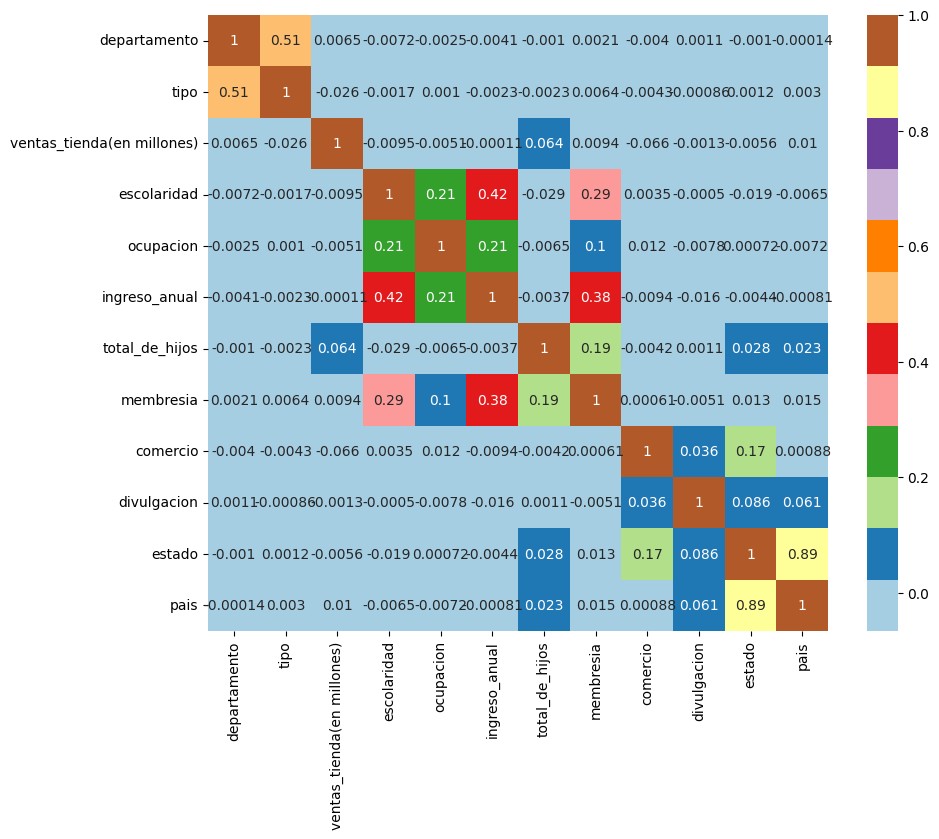

In [41]:
# calcular y visualizar la correlación entre las variables
corr_matrix = foodmart[['departamento', 'tipo', 'ventas_tienda(en millones)', 'escolaridad',
       'ocupacion', 'ingreso_anual', 'total_de_hijos', 'membresia', 'comercio',
       'divulgacion', 'estado', 'pais']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Paired')

In [42]:
scaler = StandardScaler()   #estandariza los valores dentro de la misma escala
X_scaled = scaler.fit_transform(foodmart) #fit_transform: ajusta los datos al modelo para luego estandarizarlos
X_std = pd.DataFrame(X_scaled)
X_std

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.347803,-0.581004,0.317576,-1.130533,-1.235588,-1.061255,-1.022006,-1.232917,-0.917033,-1.455902,-1.056194,-0.688906
1,-1.347803,-0.581004,-0.257071,1.176307,-0.301701,0.047347,-1.693818,0.997910,-0.917033,-1.455902,-1.056194,-0.688906
2,-1.347803,-0.581004,-0.831718,-1.130533,0.632185,-1.061255,0.993428,-1.232917,-0.917033,-1.455902,-1.056194,-0.688906
3,-1.347803,-0.581004,-0.831718,-0.361586,0.632185,-0.506954,-0.350195,-0.117503,-0.917033,-1.197402,-1.056194,-0.688906
4,-1.347803,-0.581004,-0.706795,-1.130533,-1.235588,-0.506954,-1.693818,-0.117503,-0.917033,-0.938902,-1.056194,-0.688906
...,...,...,...,...,...,...,...,...,...,...,...,...
59210,2.965242,0.960470,-1.119042,-1.130533,-1.235588,-1.061255,-1.022006,-1.232917,2.029577,-1.197402,-0.215196,-0.688906
59211,2.965242,0.960470,-1.481319,-0.361586,-1.235588,-0.506954,-0.350195,-0.117503,2.029577,0.353597,-0.215196,-0.688906
59212,2.965242,0.960470,-0.257071,-0.361586,0.632185,-0.506954,-1.022006,-0.117503,2.029577,0.095097,-0.215196,-0.688906
59213,2.965242,0.960470,0.604900,1.176307,-0.301701,0.601648,-0.350195,-0.117503,3.011780,0.353597,1.887300,2.577191


##5.Clusterización y validación

Algoritmo utilizado para la clusterización es KMeans.

###5.1.Validando el número de clusters

La validación del número de cluster consiste en instanciar de 3-10 clusters con *KMeans*.

Las puntajes de los clusters se calculan a través de las métricas 'Silhouette', 'Davies-Bouldin' y 'Calinski and Harabasz'. Los resultados son almacenados en una variable denominada 'X_std'.



In [43]:
def get_metrics(dataset):
  # Lista para almacenar los resultados
    scores = []
  # Rango de clusters de 3 a 10
    for n_clusters in range(3, 11):
      # Instancia el modelo de KMeans con la configuración seleccionada
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
      # Ajusta el modelo a tus datos
        kmeans.fit(dataset)
      # Calcula las métricas
        silhouette = silhouette_score(dataset, kmeans.labels_)
        inercia = kmeans.inertia_
        davies_bouldin = davies_bouldin_score(dataset, kmeans.labels_)
        calinski_harabasz = calinski_harabasz_score(dataset, kmeans.labels_)
      # Almacena los resultados en la lista
        scores.append({
            'Clusters': n_clusters,
            'Inercia': inercia,
            'Silhouette': silhouette,
            'Davies-Bouldin': davies_bouldin,
            'Calinski-Harabasz': calinski_harabasz
        })

    cluster_scores = pd.DataFrame(scores)
    return cluster_scores

In [44]:
df_Xstd = get_metrics(X_std)
df_Xstd

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,562142.123198,0.105155,2.321688,7817.699545
1,4,524475.941326,0.103251,2.086750,7003.459413
2,5,493636.197693,0.115673,2.097703,6505.430431
3,6,472728.226458,0.116804,2.079304,5958.178106
4,7,455609.212776,0.116854,2.108961,5522.395277
5,8,441749.515337,0.107061,2.190249,5147.282210
6,9,429284.691836,0.108361,2.132785,4849.460422
7,10,419391.182811,0.101642,2.107991,4567.428664


**OBSERVACIONES:**

Para decidir la mejor configuración para el número de clusters se consideró:

1. *Inercia*:

Cuanto menor sea la inercia, mejor. Indica que las muestras están más cerca de los centroides de sus clusters respectivos.

2. *Silhouette*: puntaje minimo debe ser de 0.50;

Cerca de 0: Indica que la muestra está en o muy cerca del límite de decisión entre dos clusters.

3. *Davies-Bouldin*: máximo de 0.75;  

Valores más bajos indican clusters mejor definidos.
El valor óptimo es 0, que indica una buena separación entre clusters.

4. *CalinskiHarabasz*: el número más alto posible.

Cuanto mayor sea el valor, mejor, ya que indica una mayor separación entre los clusters y una mayor cohesión dentro de los clusters.

- **EL MEJOR NÚMERO DE CLUSTERS ES: 6**.

###5.2.Evaluando la estructura

La evaluación de la estructura de los clusters consiste en la comparación del dataset 'X_std' con 'random_data'. 'random_data' es una baseline generada con el modulo random(numpy), que genera números aleatorios y que presenta la misma dimensión de datos que 'X_std'.

El objetivo es asegurarse que los puntajes obtenidos en 'X_std' tengan un mejor desempeño respecto a 'random_data'.

In [45]:
x_data = np.random.rand(*X_std.shape) #datos metrica
random_data = get_metrics(x_data)
random_data

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,53215.444949,0.052957,3.438947,3335.255400
1,4,51402.803314,0.053989,3.301989,2997.881539
2,5,50045.489024,0.052581,2.996255,2710.817047
3,6,48880.717398,0.052211,2.814659,2502.463084
4,7,47843.503744,0.052574,2.732057,2344.488353
5,8,46913.465943,0.053380,2.640666,2217.050492
6,9,46096.496803,0.053060,2.535318,2105.425839
7,10,45313.998826,0.053782,2.441159,2017.378147


In [46]:
# Función para comparar performance de las metricas
def compare_metrics(df1, df2, label1='Set 1', label2='Set 2', color=None):
    # Obtén el número de clusters y las métricas para ambos conjuntos
    clusters1, inercia1, silhouette_scores1, davies_bouldin_scores1, calinski_harabasz_scores1 = (
        df1['Clusters'],
        df1['Inercia'],
        df1['Silhouette'],
        df1['Davies-Bouldin'],
        df1['Calinski-Harabasz']
    )

    clusters2, inercia2, silhouette_scores2, davies_bouldin_scores2, calinski_harabasz_scores2 = (
        df2['Clusters'],
        df2['Inercia'],
        df2['Silhouette'],
        df2['Davies-Bouldin'],
        df2['Calinski-Harabasz']
    )

    plt.figure(figsize=(18, 8))

     # Gráfico de Inercia
    plt.subplot(2, 2, 1)
    plt.plot(clusters1, inercia1, marker='o', label=label1, color=color[0])
    plt.plot(clusters2, inercia2, marker='o', label=label2, color=color[1])
    plt.title('Inercia Score')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Puntuación')
    plt.legend()

    # Gráfico de Silhouette Score
    plt.subplot(2, 2, 2)
    plt.plot(clusters1, silhouette_scores1, marker='o', label=label1, color=color[0])
    plt.plot(clusters2, silhouette_scores2, marker='o', label=label2, color=color[1])
    plt.title('Silhouette Score')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Puntuación')
    plt.legend()

    # Gráfico de Davies-Bouldin Score
    plt.subplot(2, 2, 3)
    plt.plot(clusters1, davies_bouldin_scores1, marker='o', label=label1, color=color[0])
    plt.plot(clusters2, davies_bouldin_scores2, marker='o', label=label2, color=color[1])
    plt.title('Davies-Bouldin Score')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Puntuación')
    plt.legend()

    # Gráfico de Calinski and Harabasz Score
    plt.subplot(2, 2, 4)
    plt.plot(clusters1, calinski_harabasz_scores1, marker='o', label=label1, color=color[0])
    plt.plot(clusters2, calinski_harabasz_scores2, marker='o', label=label2, color=color[1])
    plt.title('Calinski-Harabasz Score')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Puntuación')
    plt.legend()

    # Ajusta el diseño y muestra los gráficos
    plt.tight_layout()
    plt.show()

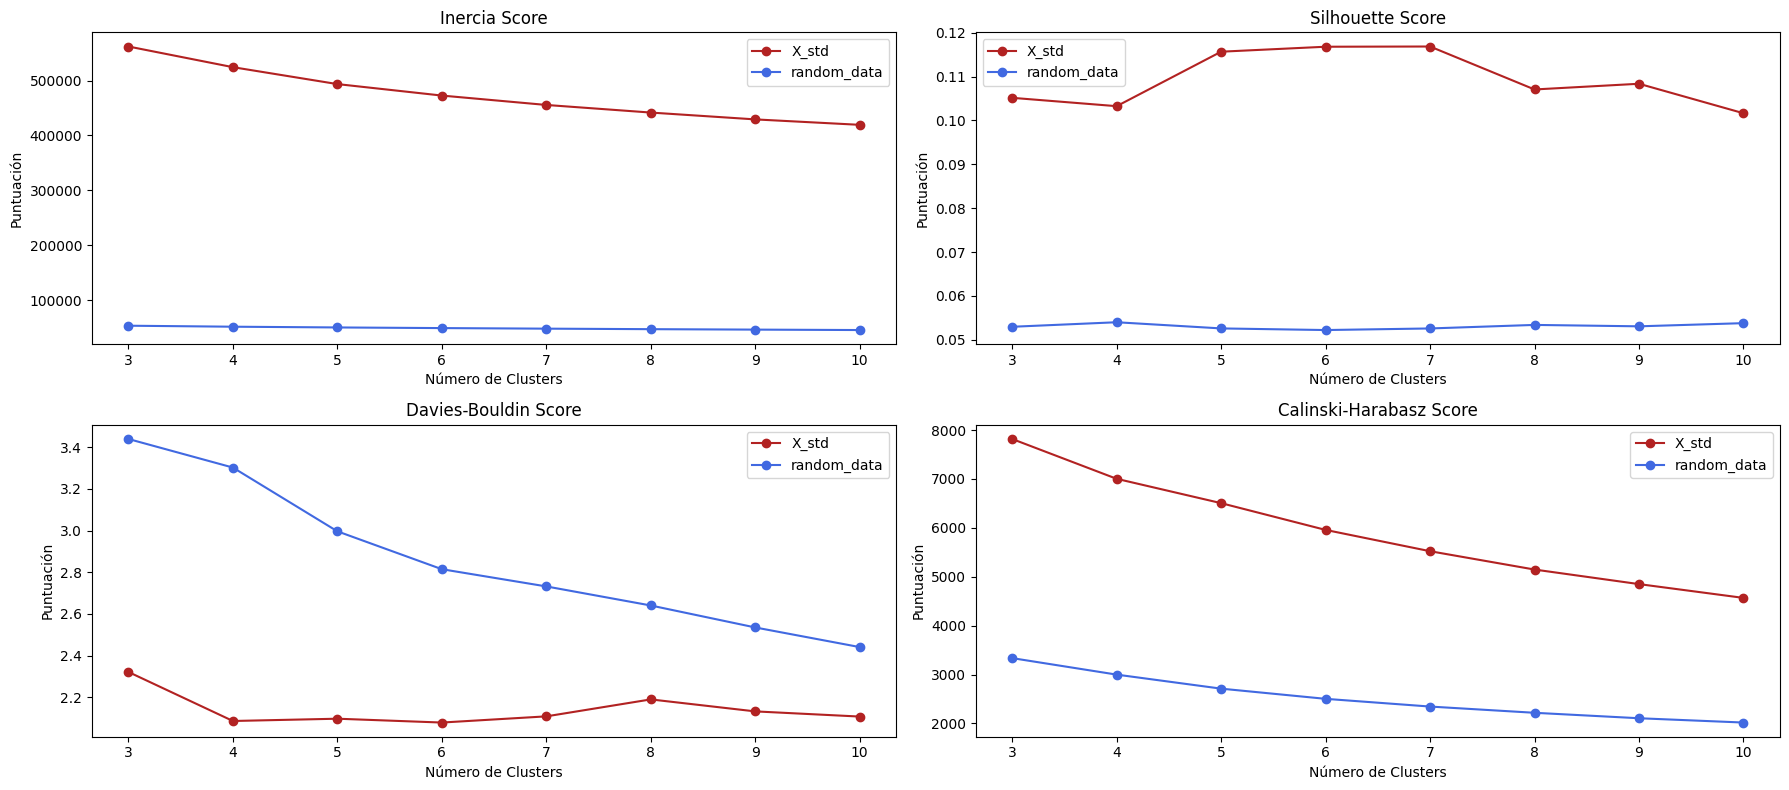

In [47]:
compare_metrics(df_Xstd, random_data, label1="X_std", label2="random_data", color=['firebrick', 'royalblue'])

###5.3.Evaluando la estabilidad

La estabilidad de los clusters se evalua comparando los puntajes obtenidos para las metricas con el dataset X_std. Para ello, se segmeta el dataset X_std en 5 partes iguales usando la función array_split().

Cada fragmento del dataset es almacenada en variables (set_1, set_2,... set_5), seguido de esto se repite el proceso de validación para cada cluster. Lo importante es que los puntajes no presenten una variación mayor a ±5% entre sí. Esto garantiza la homogeneidad en la composición de los clusters.

In [48]:
# Usa array_split para dividir X_std en 5 partes iguales
sets = np.array_split(X_std, 5)

# Almacena cada fragmento en variables set_1, set_2, ..., set_5
for i, set_data in enumerate(sets, start=1):
    locals()[f'set_{i}'] = set_data

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [49]:
df_Xstd

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,562142.123198,0.105155,2.321688,7817.699545
1,4,524475.941326,0.103251,2.086750,7003.459413
2,5,493636.197693,0.115673,2.097703,6505.430431
3,6,472728.226458,0.116804,2.079304,5958.178106
4,7,455609.212776,0.116854,2.108961,5522.395277
5,8,441749.515337,0.107061,2.190249,5147.282210
6,9,429284.691836,0.108361,2.132785,4849.460422
7,10,419391.182811,0.101642,2.107991,4567.428664


In [50]:
get_metrics(set_1)

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,90719.836699,0.124836,2.070084,1932.849790
1,4,84329.433241,0.140780,2.054812,1685.146117
2,5,79255.731211,0.143938,2.027397,1534.110970
3,6,75514.605171,0.144483,2.022916,1405.266891
4,7,72236.868194,0.147478,1.937321,1313.600050
5,8,69424.432918,0.124370,2.017804,1239.947361
6,9,67176.845444,0.125113,1.892709,1170.655035
7,10,65093.675160,0.119140,1.932564,1115.866116


In [51]:
get_metrics(set_2)

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,113096.331016,0.147130,2.117996,1812.020902
1,4,105762.246433,0.110262,2.042079,1565.337501
2,5,100095.515840,0.116914,2.202157,1407.916037
3,6,95670.067619,0.111463,2.140757,1287.836567
4,7,92263.407096,0.116049,2.186790,1185.566509
5,8,88663.855037,0.115854,2.084833,1126.005618
6,9,85830.041632,0.117198,2.101651,1066.537268
7,10,83771.722940,0.104692,2.133416,1003.550739


In [52]:
get_metrics(set_3)

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,105537.785691,0.114409,2.244106,1662.446706
1,4,99215.891982,0.125329,2.215895,1430.272613
2,5,93140.339982,0.122106,2.110481,1335.632719
3,6,88659.959241,0.124139,2.032411,1242.040925
4,7,85871.353031,0.111545,2.085182,1132.616552
5,8,82524.108178,0.111273,2.096155,1078.683375
6,9,80630.730283,0.107913,2.166839,1000.668184
7,10,78271.827891,0.099373,2.114844,955.832473


In [53]:
get_metrics(set_4)

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,111696.649424,0.124188,2.275091,1587.985098
1,4,104436.163921,0.098008,2.087228,1406.513859
2,5,98191.772359,0.112496,2.098973,1310.080943
3,6,94088.679474,0.109856,2.061567,1196.917002
4,7,90473.983705,0.110806,2.123609,1116.005479
5,8,87452.412463,0.110543,2.164590,1047.960005
6,9,85171.668624,0.113047,2.112330,981.053385
7,10,82735.914035,0.112913,2.057886,936.350293


In [54]:
get_metrics(set_5)

,Clusters,Inercia,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,3,115470.194305,0.102149,2.370688,1511.612860
1,4,108732.930087,0.096238,2.218756,1314.620320
2,5,102529.686246,0.109237,2.190129,1224.583229
3,6,98386.921008,0.108626,2.240850,1120.510383
4,7,94644.875078,0.109272,2.166004,1048.594041
5,8,91566.730486,0.101351,2.184537,985.765212
6,9,89207.388421,0.105429,2.086458,924.404098
7,10,86737.135574,0.105074,2.079841,882.467170


###5.4.Instanciando la mejor configuración de clusters
Asignación de clusters a cada registro de cliente según sus valores particulares.

In [55]:
# Asginanción de clusters a clientes
datos_raw = pd.DataFrame(data=datos_sp) #nuevo dataframe con datos de clientes
num_clusters = 6 # clusters a instanciar
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42) # instanciando modelo KMeans para 6 clusters
cluster_labels = kmeans_model.fit_predict(X_std) # entrenando modelo con datos estandarizados para obtener las etiquetas de los clusters
cluster_labels += 1  # empieza etiquetas de 1 a 6
datos_raw['cluster'] = cluster_labels #nuevo atributo, asigna la etiqueta del cluster correspondiente para cada cliente

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [56]:
# modificando el orden de los atributos
column_order = ['cluster'] + [col for col in datos_raw if col != 'cluster'] #ciclo que posiciona 'cluster' como primer atributo
datos_raw = datos_raw[column_order] #aplicamos la lista al dataframe

In [57]:
datos_raw.sample(5)

,cluster,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,membresia,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
56666,6,Productos para hornear,Productos para hornear,Comida,1.89,0.8505,3.0,Venta Ahorra Ya,Estados Unidos,Casado,Masculino,4.0,Primaria,Oro,Profesional,Sí,3.0,80000,4.0,BBB Best,0.63,7.72,5.71,0.0,1.0,36.0,Supermercado,Los Angeles,CA,23598.0,14210.0,5633.0,3755.0,0.0,0.0,0.0,0.0,1.0,Periódico diario,81.79
29097,6,Carne,Charcutería,Comida,7.12,3.0616,4.0,Venta Doble,Estados Unidos,Soltero,Masculino,4.0,Secundaria,Plata,Técnico,No,3.0,40000,0.0,Lake,1.78,14.40,13.30,0.0,1.0,6.0,Supermercado de lujo,Tacoma,WA,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,Televisión,95.74
49050,3,Alimentos para el desayuno,Alimentos para el desayuno,Comida,7.59,2.5047,3.0,Estantes vacíos,México,Soltero,Femenino,2.0,Primaria,Bronce,Obrero,No,2.0,60000,0.0,Radius,2.53,13.10,10.10,1.0,1.0,12.0,Supermercado gourmet,Camacho,Zacatecas,23759.0,16844.0,4149.0,2766.0,1.0,0.0,1.0,1.0,1.0,"Periódico diario, radio",147.82
35846,1,Atún enlatado,Alimentos enlatados,Comida,3.84,1.8816,3.0,Super Ahorradores,Estados Unidos,Soltero,Masculino,4.0,Primaria,Sin membresia,Técnico,No,0.0,20000,0.0,Just Right,1.28,9.48,8.47,0.0,1.0,16.0,Supermercado de lujo,Tacoma,WA,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,Periódico dominical,69.65
56945,6,Productos para hornear,Productos para hornear,Comida,1.06,0.4240,2.0,Especial luz verde,Estados Unidos,Casado,Masculino,3.0,Secundaria,Oro,Técnico,Sí,2.0,40000,3.0,BBB Best,0.53,12.80,11.80,1.0,0.0,28.0,Supermercado,Bremerton,WA,39696.0,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,Cupón en la tienda,123.02


##6.Dispersión de los clusters

In [58]:
datos_raw.columns

Index(['cluster', 'categoria_alimento', 'departamento', 'tipo',
       'ventas_tienda(en millones)', 'costo_tienda(en millones)',
       'ventas_unitarias(en millones)', 'promocion', 'pais', 'estado_civil',
       'genero', 'total_de_hijos', 'escolaridad', 'membresia', 'ocupacion',
       'vivienda_propia', 'promedio_autos(aprox)', 'ingreso_anual',
       'numero_hijos', 'marca', 'precio_recomendado', 'peso_bruto',
       'peso_neto', 'empaque_reciclable', 'bajo_en_grasa', 'unidades_por_caja',
       'comercio', 'ciudad', 'estado', 'pies_cuadrados_tienda',
       'pies_cuadrados_comestibles', 'pies_cuadrados_congelados',
       'pies_cuadrados_carne', 'cafeteria', 'tienda_de_videos',
       'barra_de_ensaladas', 'comida_preparada', 'floristeria', 'divulgacion',
       'costo'],
      dtype='object')

In [59]:
# Función gráfico de anillo

def graf_anillo(parametro1, parametro2, titulo1, titulo2, palette1,palette2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Figura con dos subplots, izq y der

    # Gráfico de pie izquierdo
    # grafico de pie, parametro, etiquetas, paleta de color, angulo de inicio, formato de porcentaje, explode y distancia
    ax1.pie(parametro1, labels=parametro1.index, colors=sns.color_palette(palette1), startangle=90, autopct='%1.2f%%',pctdistance=0.80, explode=[0.05]*len(parametro1)) #configuraciones del pie
    hole1 = plt.Circle((0, 0), 0.65, facecolor='white') # circulo blanco radio 0.65
    ax1.add_artist(hole1) # añadir circulo al gráfico de pie
    ax1.set_title(titulo1, loc='center', fontweight='bold') # titulo

    # Gráfico de pie derecho
    #wedges2, texts2, autotexts2 =
    ax2.pie(parametro2, labels=parametro2.index, colors=sns.color_palette(palette2), startangle=160, autopct='%1.2f%%', pctdistance=0.80, explode=[0.05]*len(parametro2)) #configuraciones del pie
    hole2 = plt.Circle((0, 0), 0.65, facecolor='white') # circulo blanco radio 0.65
    ax2.add_artist(hole2) # añadir circulo al gráfico de pie
    ax2.set_title(titulo2, loc='center', fontweight='bold')  # titulo

    # Configuración y mostrar
    sns.set(font_scale=1) # tamaño de etiquetas
    fig.suptitle('Análisis por categoría', fontsize=16, fontweight='bold', y=1.02) # titulo, tamaño, y negritas
    fig.tight_layout() # ajute automatico
    plt.show()

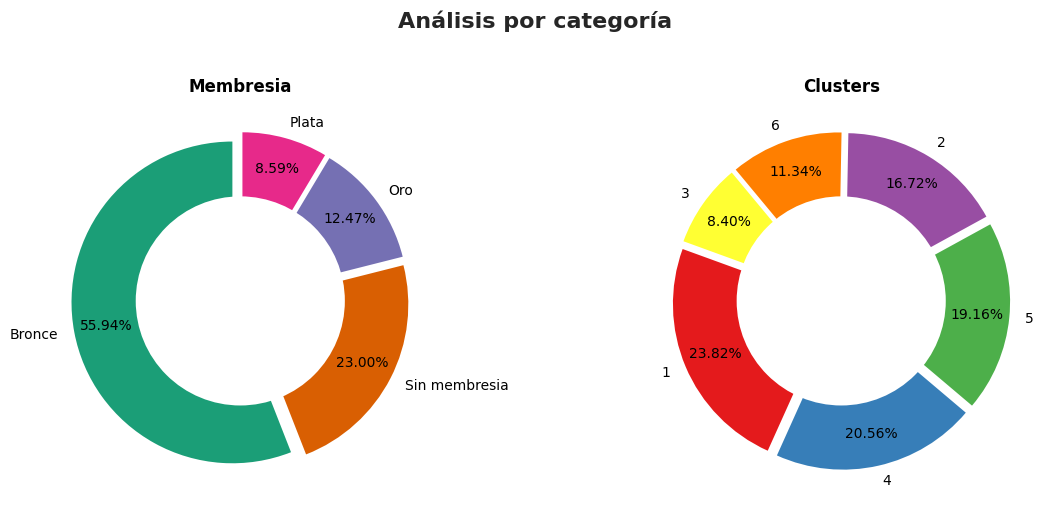

In [60]:
cluster_counts = datos_raw['cluster'].value_counts() # Var que contiene conteo de clusters
membresia = datos_raw['membresia'].value_counts() # Var que contiene conteo de membresia

graf_anillo(membresia, cluster_counts,  "Membresia", "Clusters", 'Dark2', 'Set1')

In [61]:
# Función gráfico de dispersión y gráfico de barras

def dispersion_barras(parametro1, parametro2, parametro3, tituloimagen, titulo1, titulo2, palette1, palette2):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # Figura con dos subplots, izq y der

  # Gráfico de dispersión (izquierda)
  sns.scatterplot(data=datos_raw, x=parametro1, y=parametro2, hue='cluster', palette=palette1, ax=ax1) # Configuración del gráfico
  ax1.set_xlabel(parametro1)
  ax1.set_ylabel(parametro2)
  ax1.set_xlabel('') # Titulo eje x vacío
  ax1.set_title(titulo1, loc='center', fontweight='bold')  # Título del gráfico de dispersión

  # Gráfico de barras (derecha)
  sns.countplot(data=datos_raw, x='cluster', hue=parametro3, palette=palette2, ax=ax2) # Configuración del gráfico
  ax2.set_title(titulo2, loc='center', fontweight='bold')  # Título del gráfico de barras
  ax2.set_xlabel('') # Titulo eje x vacío

  # Ajustes finales y mostrar la figura
  sns.set(font_scale=1)  # Tamaño de la fuente general
  fig.suptitle(tituloimagen, fontsize=16, fontweight='bold', y=1.02)  # Título de la figura

  fig.tight_layout()  # Ajuste automático de márgenes
  plt.show()

In [62]:
# Misma función gráfico de dispersión y gráfico de barras pero con leyenda externa y etiquetas verticales

def dispersion_bar2(parametro1, parametro2, parametro3, tituloimagen, titulo1, titulo2, palette1, palette2):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))  # Figura con dos subplots, izq y der

  # Gráfico de dispersión (izquierda)
  sns.scatterplot(data=datos_raw, x=parametro1, y=parametro2, hue='cluster', palette=palette1, ax=ax1) # Configuración del gráfico
  ax1.set_xlabel(parametro1)
  ax1.set_ylabel(parametro2)
  ax1.set_xlabel('') # Titulo eje x vacío
  ax1.tick_params(axis='x', labelrotation=90)  # Etiquetas del eje x en 90 grados
  ax1.set_title(titulo1, loc='center', fontweight='bold')  # Título del gráfico de dispersión
  ax1.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)  # Colocar la leyenda en el extremo superior derecho

  # Gráfico de barras (derecha)
  sns.countplot(data=datos_raw, x='cluster', hue=parametro3, palette=palette2, ax=ax2) # Configuración del gráfico
  ax2.set_title(titulo2, loc='center', fontweight='bold')  # Título del gráfico de barras
  ax2.set_xlabel('') # Titulo eje x vacío
  ax2.tick_params(axis='x', labelrotation=90)  # Rotar etiquetas del eje x en 90 grados
  ax2.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)  # Colocar la leyenda en el extremo superior derecho

  # Ajustes finales y mostrar la figura
  sns.set(font_scale=1)  # Tamaño de la fuente general
  fig.suptitle(tituloimagen, fontsize=16, fontweight='bold', y=1.02)  # Título de la figura

  fig.tight_layout()  # Ajuste automático de márgenes
  plt.show()

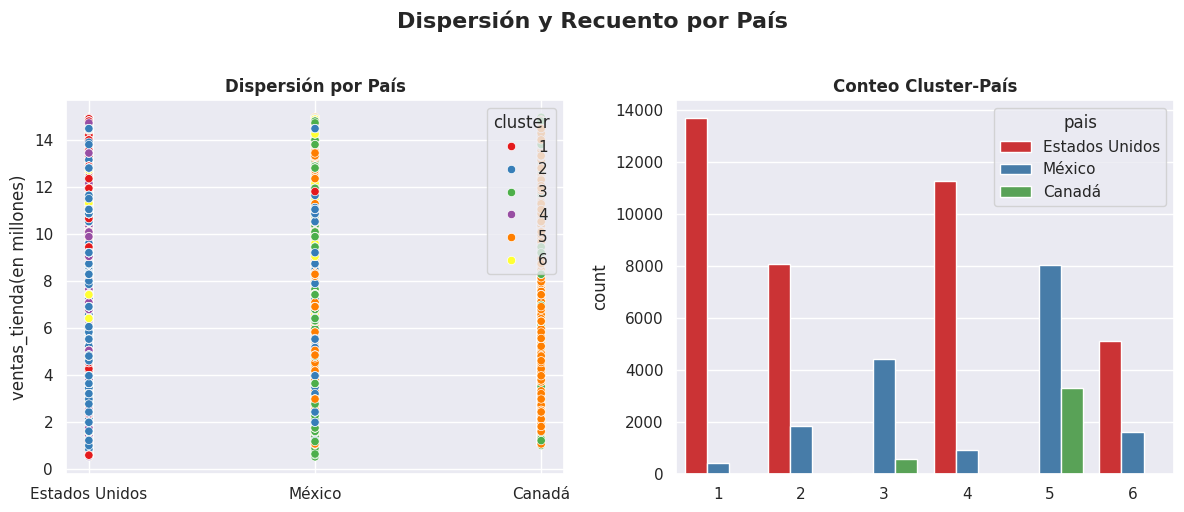

In [63]:
tituloimg = "Dispersión y Recuento por País"
titulo1 = "Dispersión por País"
titulo2 = "Conteo Cluster-País"

dispersion_barras('pais', 'ventas_tienda(en millones)', 'pais', tituloimg,  titulo1, titulo2, 'Set1', 'Set1')

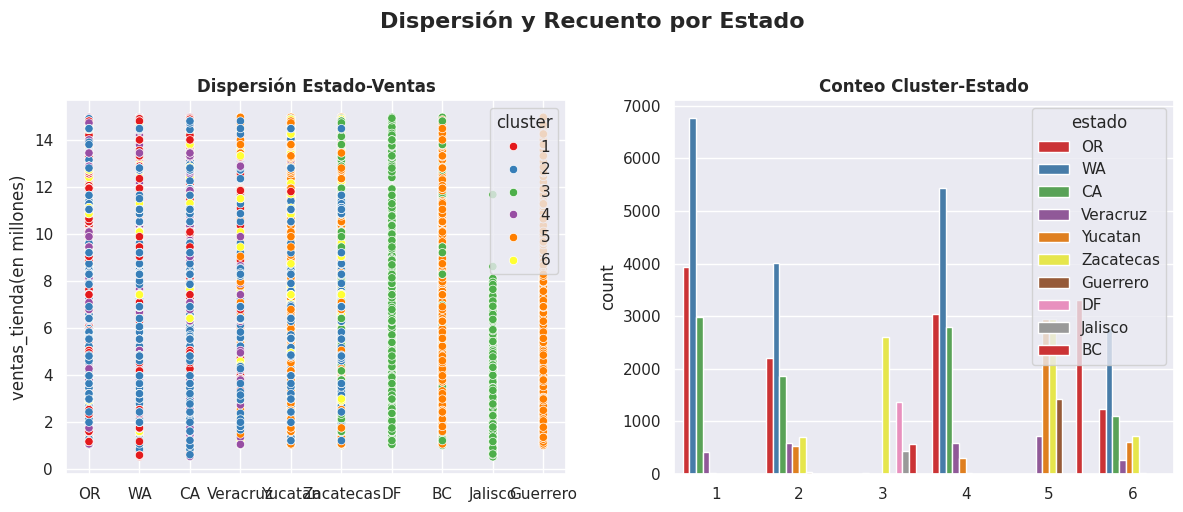

In [64]:
tituloimg = "Dispersión y Recuento por Estado"
titulo1 = "Dispersión Estado-Ventas"
titulo2 = "Conteo Cluster-Estado"

dispersion_barras('estado', 'ventas_tienda(en millones)', 'estado', tituloimg,  titulo1,titulo2, 'Set1', 'Set1')

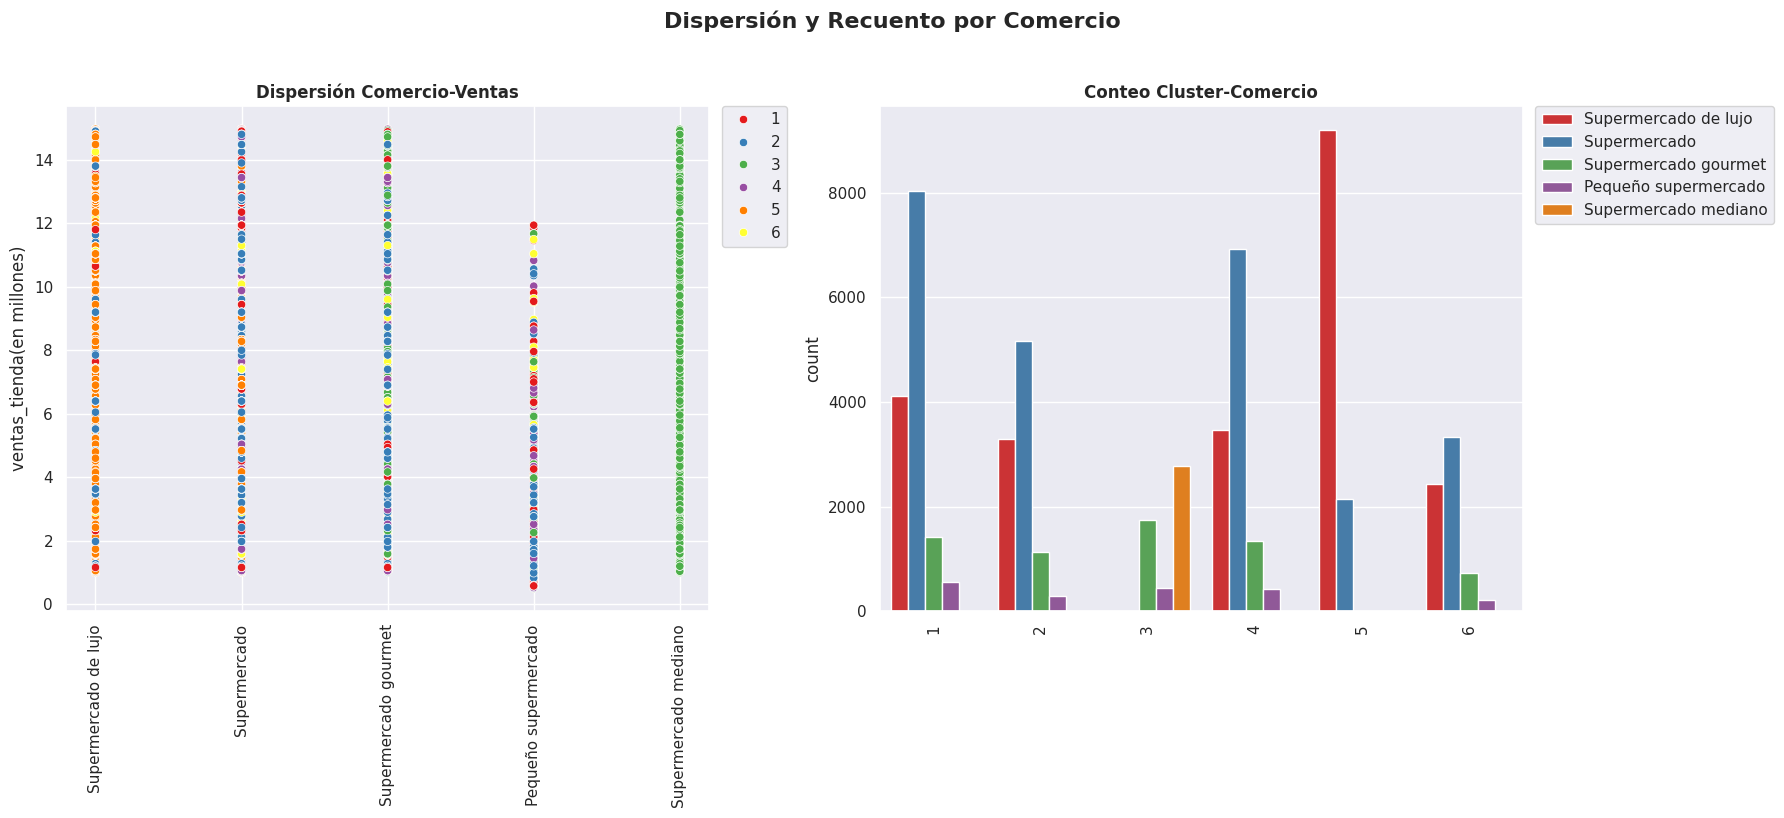

In [65]:
tituloimg = "Dispersión y Recuento por Comercio"
titulo1 = "Dispersión Comercio-Ventas"
titulo2 = "Conteo Cluster-Comercio"

dispersion_bar2('comercio', 'ventas_tienda(en millones)', 'comercio', tituloimg,  titulo1, titulo2, 'Set1', 'Set1')

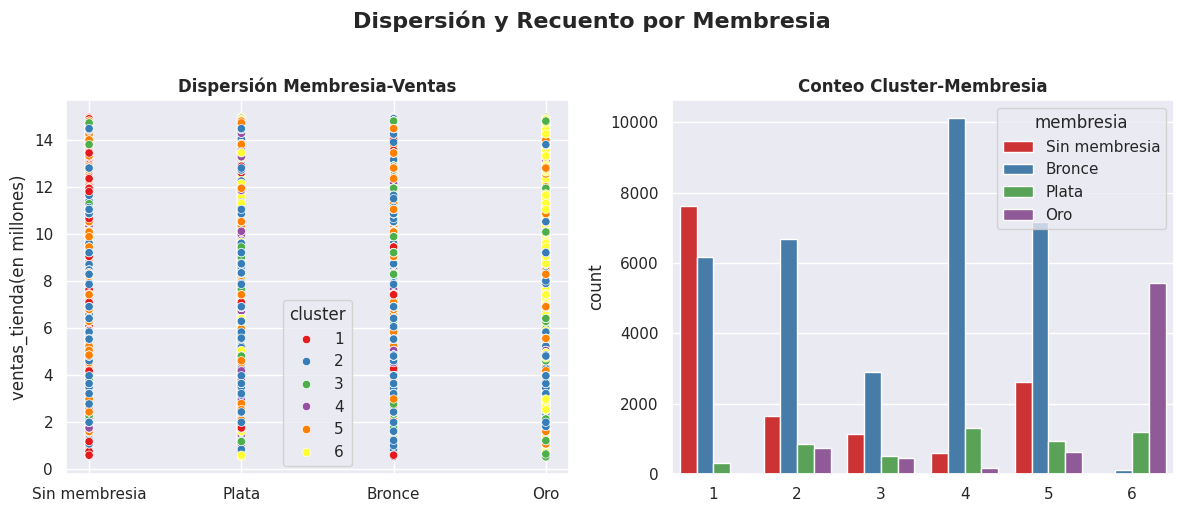

In [66]:
tituloimg = "Dispersión y Recuento por Membresia"
titulo1 = "Dispersión Membresia-Ventas"
titulo2 = "Conteo Cluster-Membresia"

dispersion_barras('membresia', 'ventas_tienda(en millones)', 'membresia', tituloimg,  titulo1,titulo2, 'Set1', 'Set1')


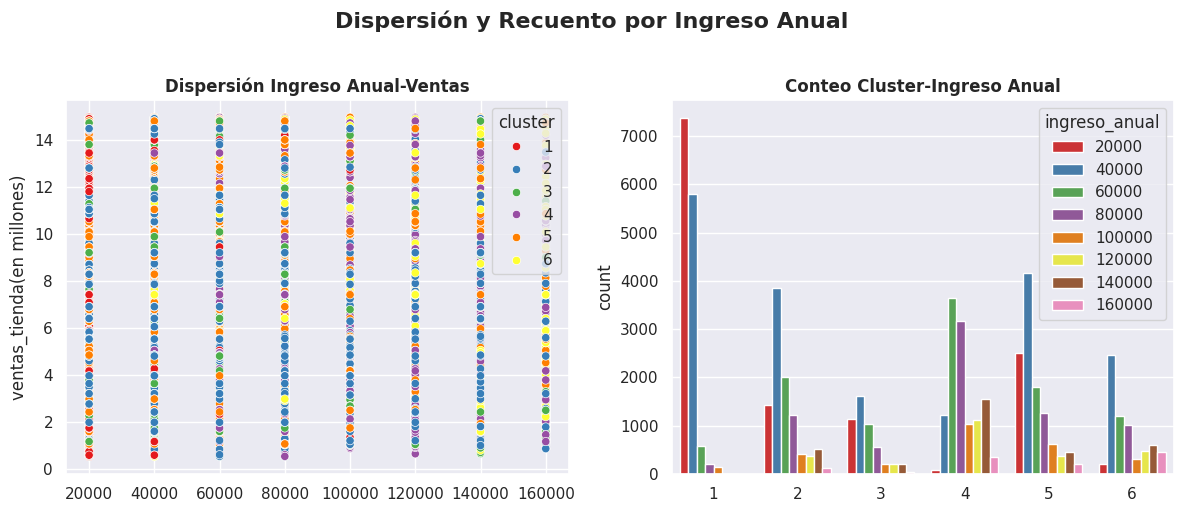

In [67]:
tituloimg = "Dispersión y Recuento por Ingreso Anual"
titulo1 = "Dispersión Ingreso Anual-Ventas"
titulo2 = "Conteo Cluster-Ingreso Anual"

dispersion_barras('ingreso_anual', 'ventas_tienda(en millones)', 'ingreso_anual', tituloimg,  titulo1, titulo2, 'Set1', 'Set1')

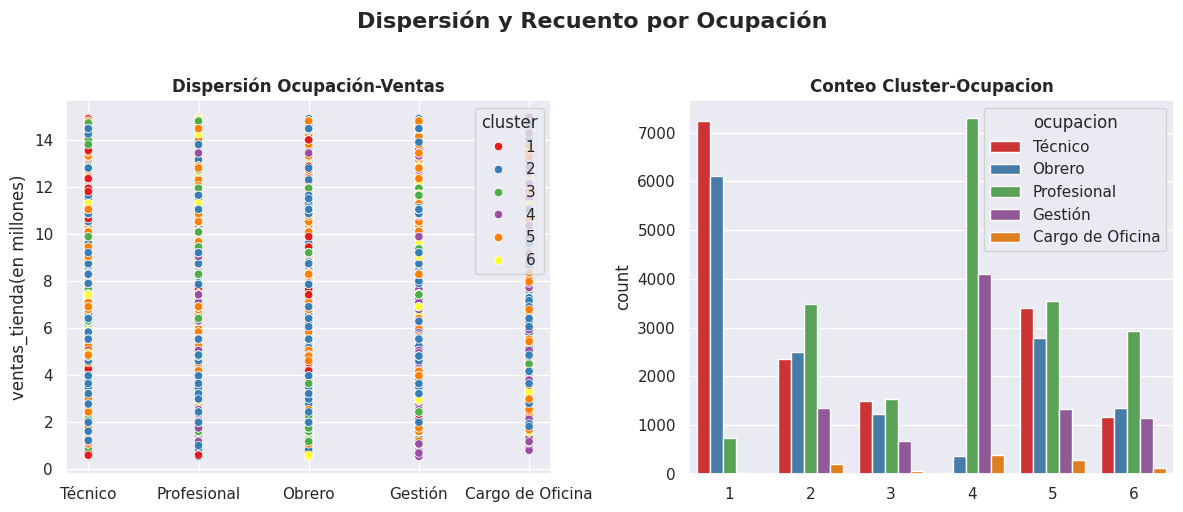

In [68]:
tituloimg = "Dispersión y Recuento por Ocupación"
titulo1 = "Dispersión Ocupación-Ventas"
titulo2 = "Conteo Cluster-Ocupacion"

dispersion_barras('ocupacion', 'ventas_tienda(en millones)', 'ocupacion', tituloimg,  titulo1, titulo2, 'Set1', 'Set1')

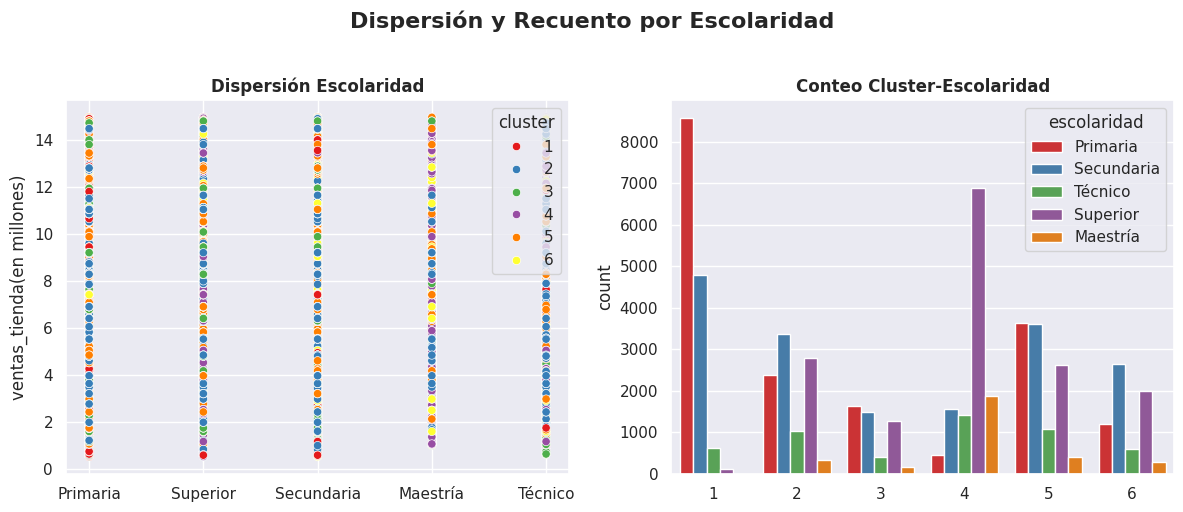

In [69]:
tituloimg = "Dispersión y Recuento por Escolaridad"
titulo1 = "Dispersión Escolaridad"
titulo2 = "Conteo Cluster-Escolaridad"

dispersion_barras('escolaridad', 'ventas_tienda(en millones)', 'escolaridad', tituloimg,  titulo1, titulo2, 'Set1', 'Set1')

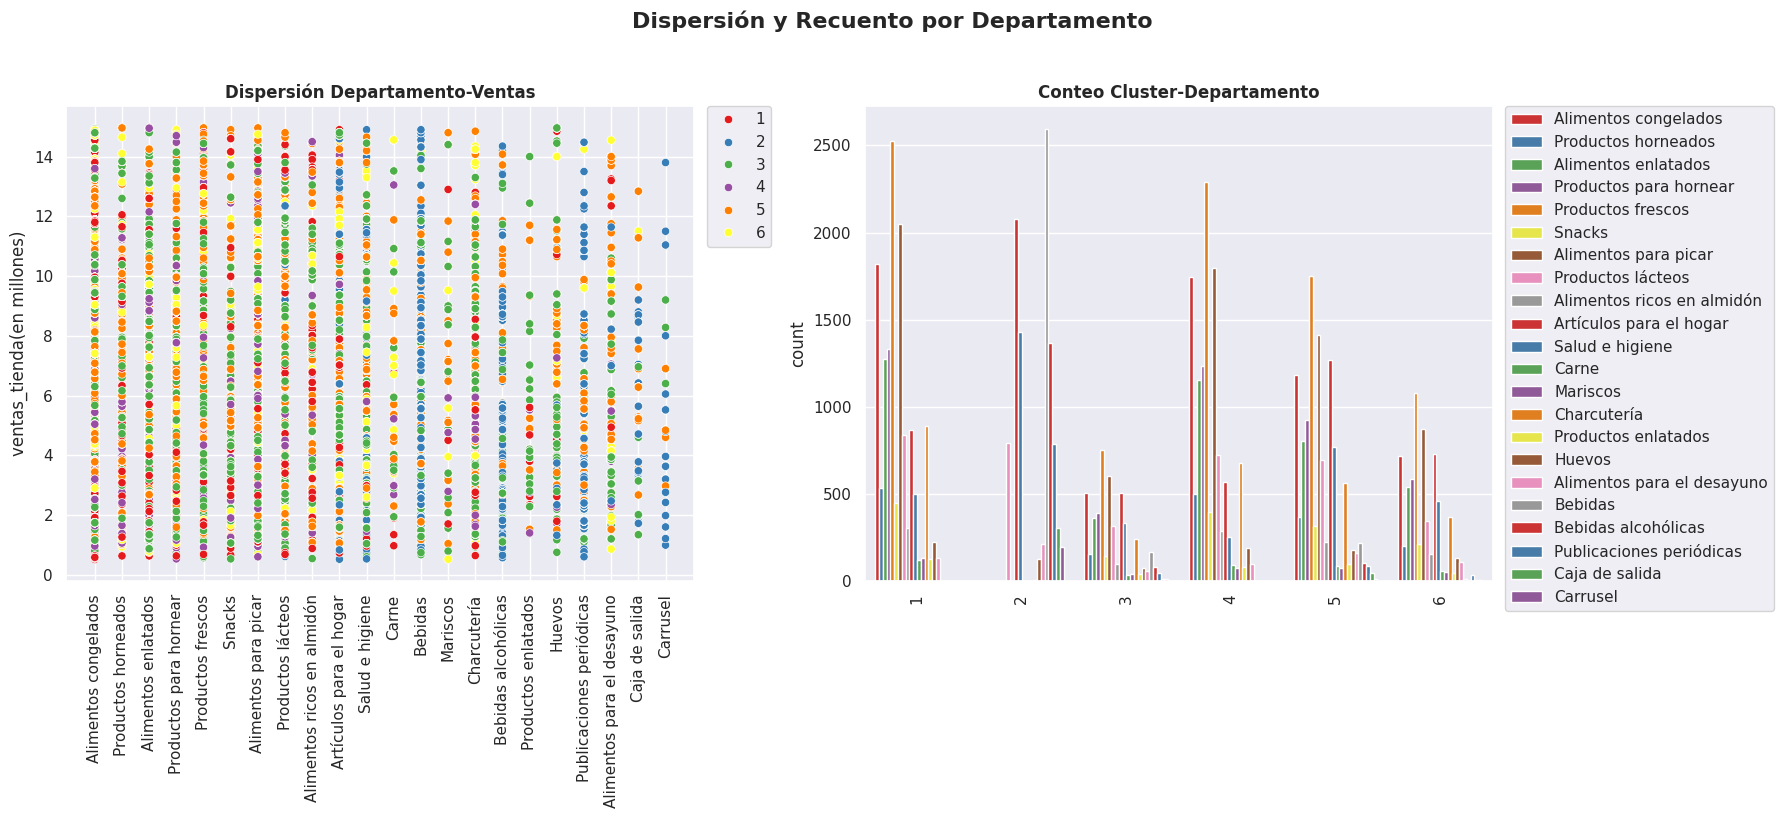

In [70]:
tituloimg = "Dispersión y Recuento por Departamento"
titulo1 = "Dispersión Departamento-Ventas"
titulo2 = "Conteo Cluster-Departamento"

dispersion_bar2('departamento', 'ventas_tienda(en millones)', 'departamento', tituloimg,  titulo1, titulo2, 'Set1', 'Set1')

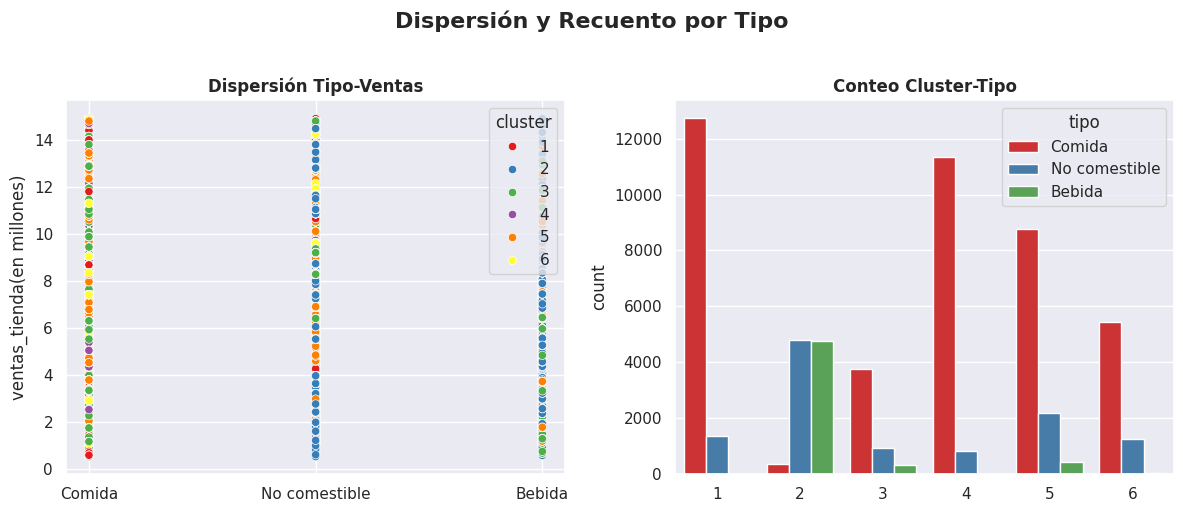

In [71]:
tituloimg = "Dispersión y Recuento por Tipo"
titulo1 = "Dispersión Tipo-Ventas"
titulo2 = "Conteo Cluster-Tipo"

dispersion_barras('tipo', 'ventas_tienda(en millones)', 'tipo', tituloimg,  titulo1, titulo2, 'Set1', 'Set1')

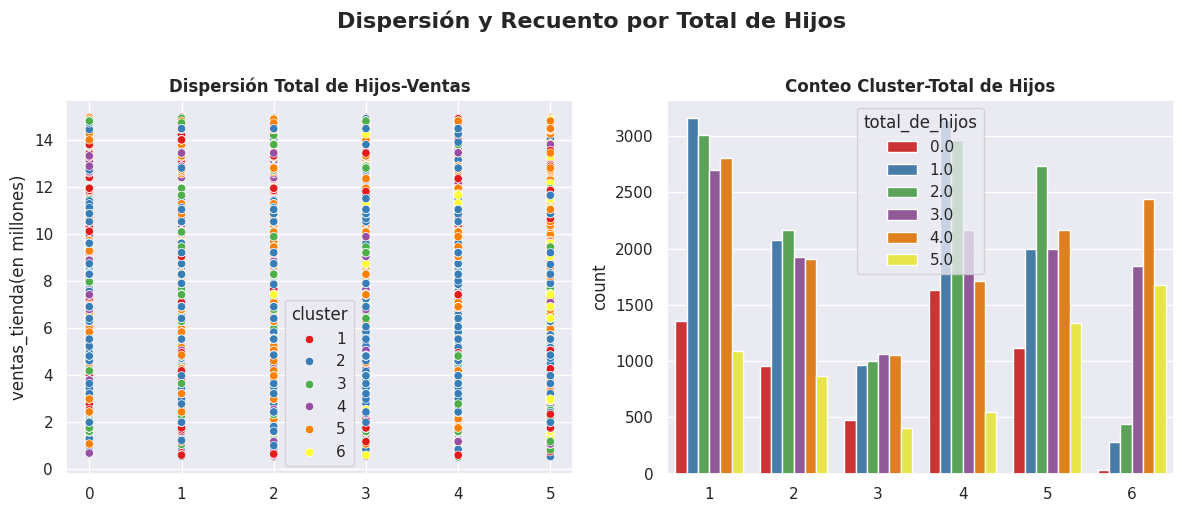

In [72]:
tituloimg = "Dispersión y Recuento por Total de Hijos"
titulo1 = "Dispersión Total de Hijos-Ventas"
titulo2 = "Conteo Cluster-Total de Hijos"

dispersion_barras('total_de_hijos', 'ventas_tienda(en millones)', 'total_de_hijos', tituloimg,  titulo1, titulo2, 'Set1', 'Set1')

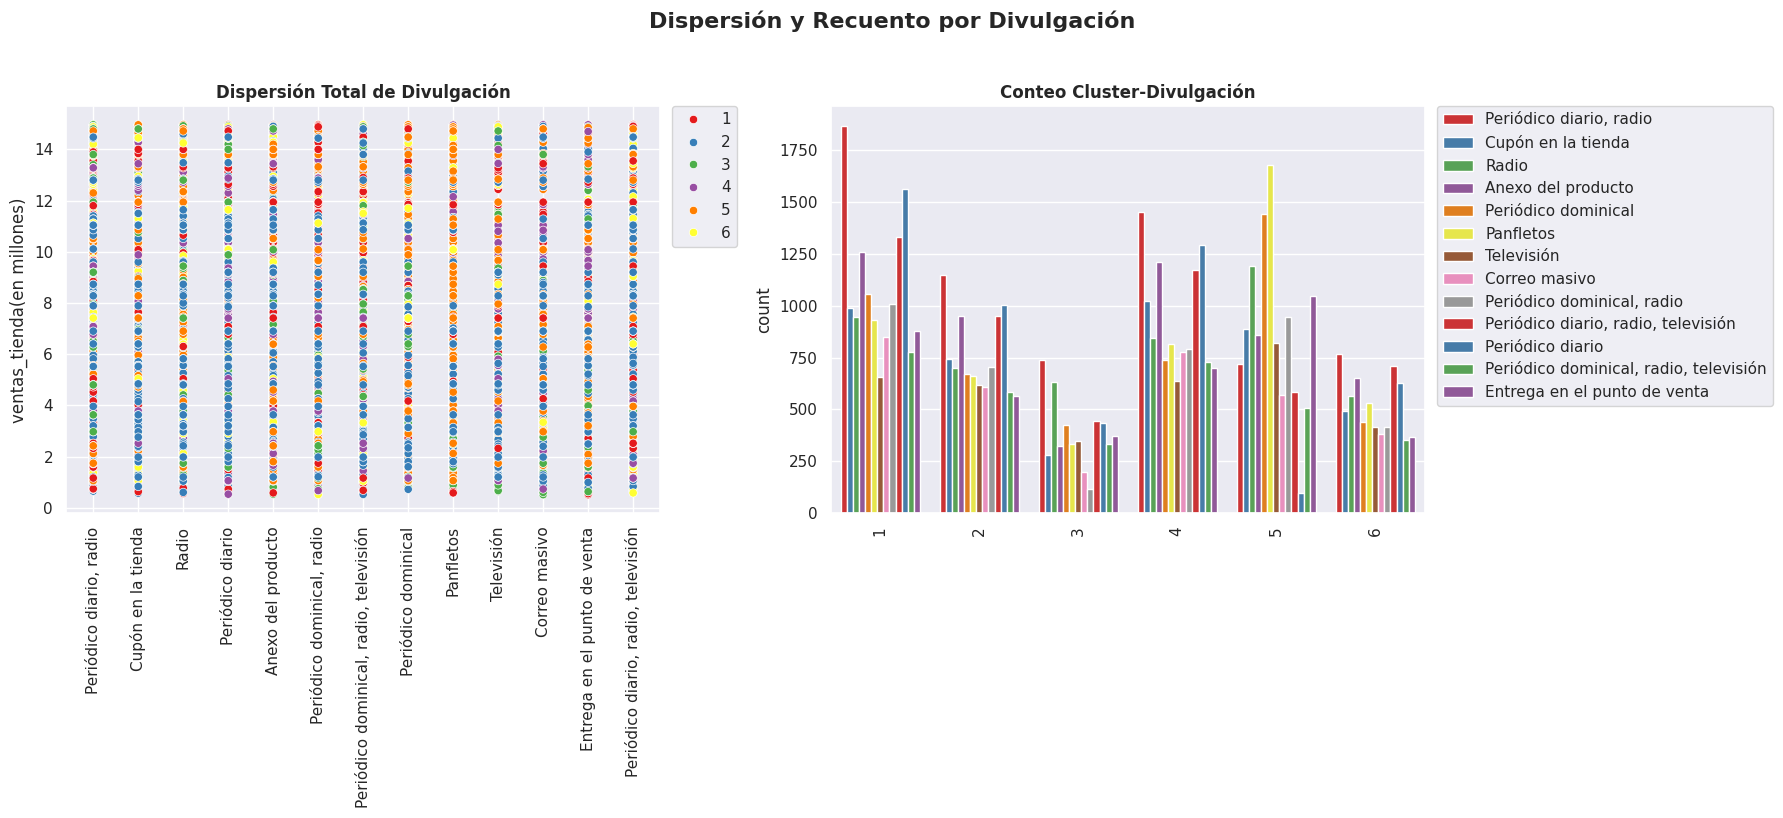

In [73]:
tituloimg = "Dispersión y Recuento por Divulgación"
titulo1 = "Dispersión Total de Divulgación"
titulo2 = "Conteo Cluster-Divulgación"

dispersion_bar2('divulgacion', 'ventas_tienda(en millones)', 'divulgacion', tituloimg,  titulo1, titulo2, 'Set1', 'Set1')

In [74]:
# Exportando dataframe en .csv
datos_raw.to_csv('datos_raw.csv', index=False)

##7.Estrategias a implementar









**1.** Entregar “Cupones en tienda”, donde al comprar cierto monto de productos del departamento “Comida”  obtienes un cupón de descuento para el departamento “Bebida”.

**2.** Realizar una campaña de marketing en medios de divulgación sobre días donde aplican promociones (“3x2”, “50% en el segundo producto”, etc.)  en departamentos “No comestible”.

**3.** Enviar por correo electrónico cupones con descuento para los departamento “Bebida” y “No comestible”.  Este debe coincidir con las fechas de promociones para departamento “Comida”.

**4.** Continuar con el programa de fidelidad (Membresías). Cada compra generará puntos a la membresía para ascender de nivel. Cada nivel otorga mejores y distintos beneficios y recompensas



##**CONCLUSIÓN:**

"La Esencia del Cliente" es un proyecto basado en la aplicación de técnicas de clusterización, en el que se utiliza Python y librerías como Scikit-Learn, pandas y numpy. La flexibilidad de pandas y numpy facilita la manipulación y transformación efectiva de los datos, preparándolos adecuadamente para su posterior análisis.

La implementación de la librería Scikit-Learn y del algoritmo de clusterización KMeans permitieron identificar patrones y agrupar a los clientes en función de en sus características y hábitos de consumo. Lo anterior proporcionó información relevante para poder ajustar y personalizar las estrategias de marketing, así como mejorar la experiencia del cliente, adaptándonos a sus preferencias y necesidades individuales.